In [3]:
%cd "~/projects/spartDM"
%load_ext autoreload
%autoreload 2

import os

print(f"Current working dir: {os.getcwd()}")

import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/kdang/projects/spartDM
Current working dir: /home/kdang/projects/spartDM


/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Example from leaspy

In [4]:
from leaspy.models import LogisticModel
from leaspy.datasets import load_dataset

alzheimer_df = load_dataset("alzheimer")
print(alzheimer_df.columns)
alzheimer_df = alzheimer_df[["MMSE", "RAVLT", "FAQ", "FDG PET"]]
print(alzheimer_df.head())

Index(['E-Cog Subject', 'E-Cog Study-partner', 'MMSE', 'RAVLT', 'FAQ',
       'FDG PET', 'Hippocampus volume ratio'],
      dtype='object')
                      MMSE     RAVLT       FAQ   FDG PET
ID     TIME                                             
GS-001 73.973183  0.111998  0.510524  0.178827  0.454605
       74.573181  0.029991  0.749223  0.181327  0.450064
       75.173180  0.121922  0.779680  0.026179  0.662006
       75.773186  0.092102  0.649391  0.156153  0.585949
       75.973183  0.203874  0.612311  0.320484  0.634809


In [3]:
alzheimer_df.index

MultiIndex([('GS-001', 73.97318267822266),
            ('GS-001', 74.57318115234375),
            ('GS-001', 75.17317962646484),
            ('GS-001', 75.77318572998047),
            ('GS-001', 75.97318267822266),
            ('GS-001', 77.77318572998047),
            ('GS-001', 78.77318572998047),
            ('GS-001', 79.07318115234375),
            ('GS-001', 79.57318115234375),
            ('GS-001', 80.57318115234375),
            ...
            ('GS-199', 82.54240417480469),
            ('GS-199', 85.04240417480469),
            ('GS-199', 85.54240417480469),
            ('GS-199', 86.04240417480469),
            ('GS-199', 86.64240264892578),
            ('GS-200', 76.13269805908203),
            ('GS-200', 76.63269805908203),
            ('GS-200', 77.13269805908203),
            ('GS-200', 77.63269805908203),
            ('GS-200', 78.13269805908203)],
           names=['ID', 'TIME'], length=1975)

In [3]:
from leaspy.io.data import Data, Dataset
from leaspy.algo import AlgorithmSettings


data = Data.from_dataframe(alzheimer_df)
dataset = Dataset(data)

test = dataset.n_observations_per_ind_per_ft
test.shape

torch.Size([200, 4])

In [10]:
dataset.get_values_patient(0)

tensor([[0.1120, 0.5105, 0.1788, 0.4546],
        [0.0300, 0.7492, 0.1813, 0.4501],
        [0.1219, 0.7797, 0.0262, 0.6620],
        [0.0921, 0.6494, 0.1562, 0.5859],
        [0.2039, 0.6123, 0.3205, 0.6348],
        [0.2130, 0.7258, 0.2435, 0.5949],
        [0.2286, 0.7651, 0.4649, 0.5732],
        [0.1518, 1.0000, 0.3249, 0.5605],
        [0.3254, 0.8997, 0.4321, 0.7348],
        [0.1667, 0.7730, 0.5632, 0.6632],
        [0.1935, 0.8679, 0.4659, 0.6386],
        [0.0973, 0.7899, 0.5714, 0.6184],
        [0.4466, 0.7223, 0.6740, 0.7107],
        [0.4649, 0.7828, 0.7493, 0.6949],
        [0.3629, 0.7833, 0.6637, 0.7268],
        [0.2391, 0.8805, 0.6547, 0.7907]])

In [10]:
model = LogisticModel(name="test-model", source_dimension=2)

algo_settings = AlgorithmSettings('mcmc_saem', 
                                  seed=42, 
                                  n_iter=100,           # n_iter defines the number of iterations
                                  progress_bar=True)     # To display a nice progression bar during calibration


In [ ]:

model.fit(
    dataset,
    algorithm_settings=algo_settings,
)

In [18]:
print(model)


=== LogisticModel test-model ===
dimension : 4
features : ['MMSE', 'RAVLT', 'FAQ', 'FDG PET']
betas_mean : [[ 0.0542,  0.0574],
              [-0.0900, -0.0068],
              [ 0.0664, -0.0534]]
log_g_mean : [ 1.5245, -0.8332,  0.5165, -0.3691]
log_v0_mean : [-3.3734, -3.5228, -2.2518, -3.6688]
noise_std : 0.0735
tau_mean : [78.5732]
tau_std : [8.5775]
xi_std : [0.5175]


In [ ]:
for k, v in model.parameters.items():
    print(f"{k}: {v.requires_grad}")



betas_mean: False
log_g_mean: False
log_v0_mean: False
noise_std: False
tau_mean: False
tau_std: False
xi_std: False


In [ ]:
# Load pretrained leaspy model

path = "workdir/debug/longitudinal_learning/leaspy_model/leaspy_model.json"

import json
with open(path, "r") as f:
    load_dict = json.load(f)

pretrain_model = LogisticModel(name="test-model", source_dimension=2)
pretrain_model.is_initialized

load_dict

{'leaspy_version': '2.0.0-dev',
 'name': 'LOGISTIC',
 'features': ['dim_0', 'dim_1', 'dim_2', 'dim_3'],
 'dimension': 4,
 'hyperparameters': {'betas_std': 0.009999999776482582,
  'log_g_std': 0.009999999776482582,
  'log_v0_std': 0.009999999776482582,
  'sources_mean': [0.0, 0.0, 0.0],
  'sources_std': 1.0,
  'xi_mean': 0.0},
 'parameters': {'betas_mean': [[-0.004061857238411903,
    0.0018039573915302753,
    -0.020231861621141434],
   [-0.004346431698650122, 0.007705886848270893, 0.006480834912508726],
   [0.0003334290813654661, 0.0016357656568288803, 0.004148196429014206]],
  'log_g_mean': [0.2659781277179718,
   0.020812880247831345,
   0.3862795829772949,
   -4.558168411254883],
  'log_v0_mean': [-4.961791038513184,
   -4.955735206604004,
   -3.7228708267211914,
   -4.992702007293701],
  'noise_std': 0.5874096751213074,
  'tau_mean': [0.11699967086315155],
  'tau_std': [3.832894802093506],
  'xi_std': [0.7166861891746521],
  'mixing_matrix': [[-0.000298218394163996,
    -0.0040623

In [58]:
pretrain_model = LogisticModel(name="logistic", source_dimension=2)
pretrain_model.is_initialized

False

In [59]:
loaded_model = pretrain_model.load(path)

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


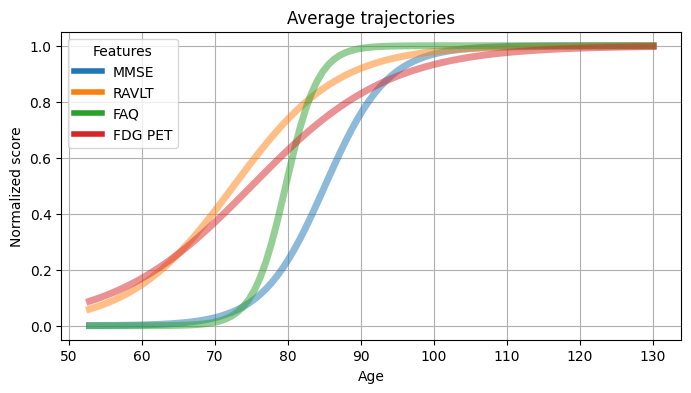

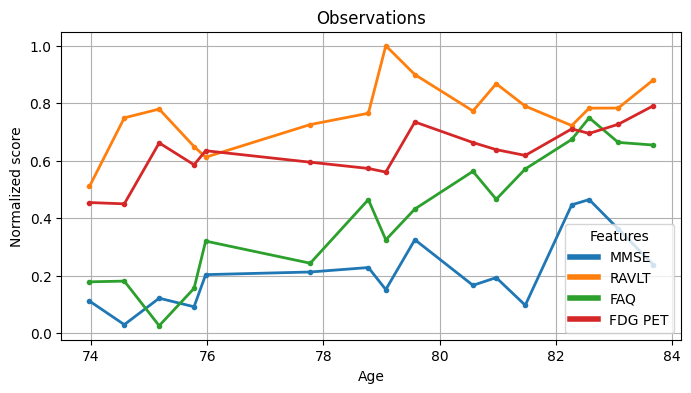

In [32]:
model.features

from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()

ax = model_plt.patient_observations(data, "GS-001")
ax.grid()
plt.show()


In [66]:
settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True, use_jacobian=True)

test_df = alzheimer_df.loc[:"GS-010"]
test_data = Data.from_dataframe(test_df)
test_ds = Dataset(test_data)

ips = model.personalize(test_ds, algorithm_settings=settings_personalization)

|----------|   0/10 subjects

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/personalize/scipy_minimize.py:626: UserWarning: In `scipy_minimize` you requested `use_jacobian=True` but it is not implemented in your model test-model. Falling back to `use_jacobian=False`...
  warnings.warn(


|##########|   10/10 subjects

Personalize with `scipy_minimize` took: 4s


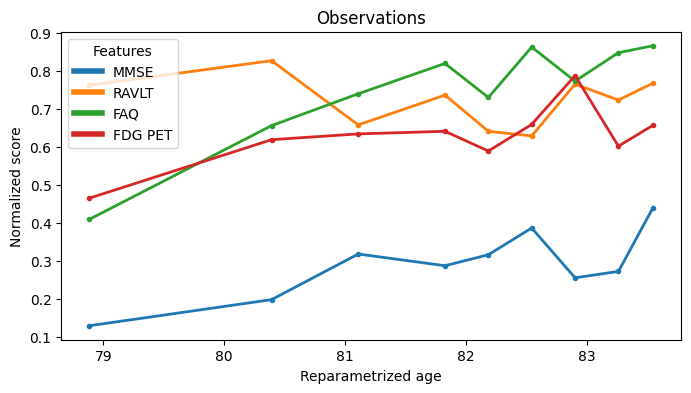

In [65]:
p_ids = ["GS-001", "GS-002", "GS-004"]
ax = model_plt.patient_observations(test_data, patients_idx="GS-010", individual_parameters=ips)
plt.show()

In [73]:
# Imputing missing data
test_id = "GS-010"
observations = test_df.loc[test_id]
print(f'Seen ages: {observations.index.values}')
print("Individual Parameters : ", ips[test_id])

timepoints = np.linspace(60, 100, 100)
reconstruction = model.estimate({test_id: timepoints}, ips)

reconstruction[test_id]

Seen ages: [70.43749237 72.53749084 73.53749084 74.53749084 75.03749084 75.53749084
 76.03749084 76.53749084 76.93749237]
Individual Parameters :  {'sources': [-0.6914712190628052, -0.19443091750144958], 'tau': [70.001708984375], 'xi': [-0.33252742886543274]}


array([[0.0325406 , 0.39632887, 0.02862136, 0.36652404],
       [0.0347384 , 0.40605792, 0.03247349, 0.37365285],
       [0.03707894, 0.4158613 , 0.03682442, 0.38083693],
       [0.0395707 , 0.42573166, 0.04173312, 0.3880735 ],
       [0.04222259, 0.43566158, 0.04726409, 0.39535987],
       [0.04504387, 0.44564342, 0.05348718, 0.40269294],
       [0.0480442 , 0.4556693 , 0.06047764, 0.41006982],
       [0.05123361, 0.46573114, 0.06831565, 0.41748732],
       [0.05462267, 0.475821  , 0.07708625, 0.4249424 ],
       [0.05822212, 0.48593068, 0.08687788, 0.43243182],
       [0.06204322, 0.4960519 , 0.09778145, 0.43995222],
       [0.06609745, 0.5061763 , 0.10988866, 0.4475002 ],
       [0.07039681, 0.51629573, 0.1232904 , 0.45507258],
       [0.0749533 , 0.5264017 , 0.13807276, 0.46266574],
       [0.07977937, 0.536486  , 0.15431555, 0.47027618],
       [0.08488778, 0.54654086, 0.17208797, 0.47790062],
       [0.0902911 , 0.55655766, 0.19144346, 0.48553523],
       [0.09600238, 0.5665288 ,

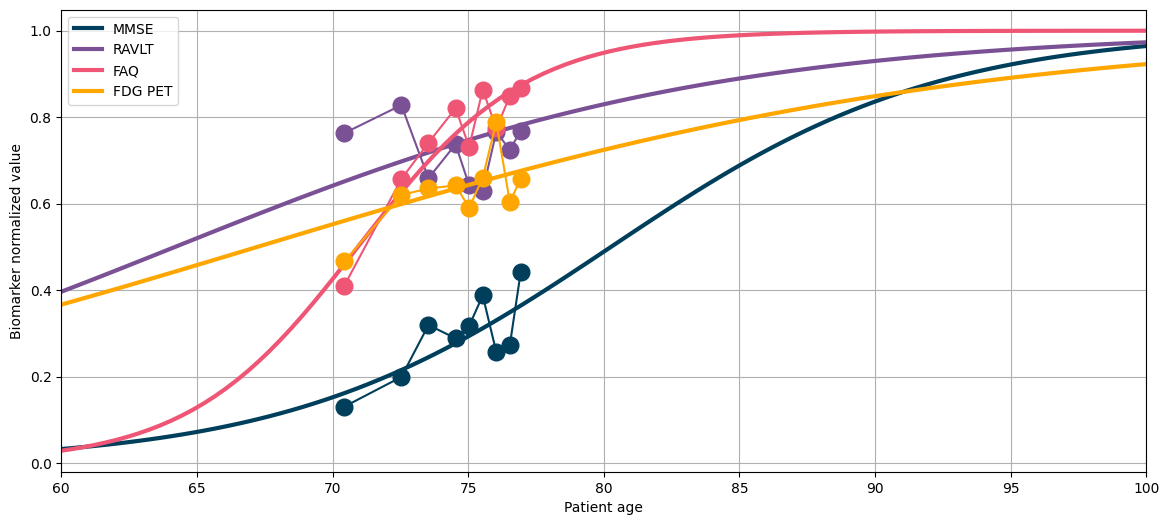

In [75]:
def plot_trajectory(timepoints, reconstruction, observations=None):

    if observations is not None:
        ages = observations.index.values
    
    plt.figure(figsize=(14, 6))
    plt.grid()
    # plt.ylim(0, .75)
    plt.ylabel('Biomarker normalized value')
    plt.xlim(60, 100)
    plt.xlabel('Patient age')
    colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
    
    for c, name, val in zip(colors, model.features, reconstruction.T):
        plt.plot(timepoints, val, label=name, c=c, linewidth=3)
        if observations is not None:
            plt.plot(ages, observations[name], c=c, marker='o', markersize=12)
        
    plt.legend()
    plt.show()
                                
plot_trajectory(timepoints, reconstruction[test_id], observations)

In [81]:
list(test_df.columns)

['MMSE', 'RAVLT', 'FAQ', 'FDG PET']

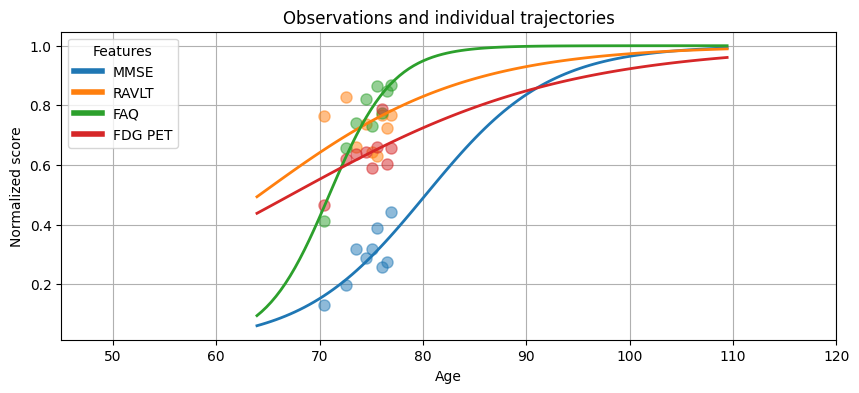

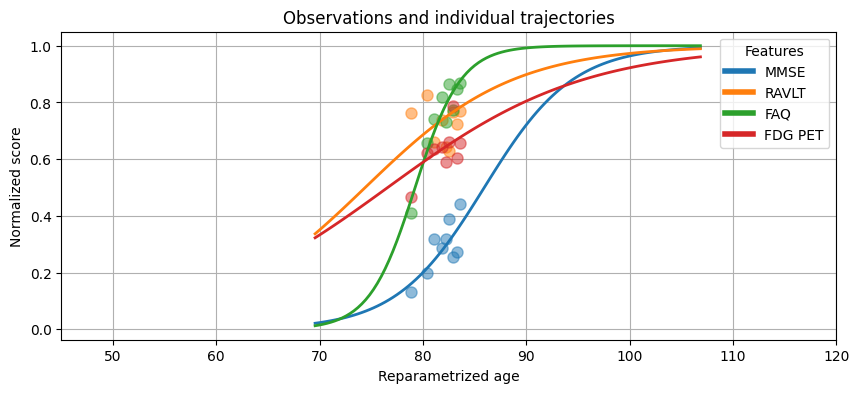

In [99]:
# Plot with Plotting

# Or with plotting object
ax = model_plt.patient_trajectories(test_data, ips,
                                          patients_idx=[test_id],
                                          labels=list(test_df.columns),
                                          #reparametrized_ages=True, # check sources effect
                                          
                                          # plot kwargs
                                          #color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
                                          alpha=1, linestyle='-', linewidth=2,
                                          #marker=None,
                                          markersize=8, obs_alpha=.5, #obs_ls=':', 
                                          figsize=(10, 4),
                                          factor_past=1,
                                          factor_future=5, # future extrapolation
                                          )
ax.grid()
ax.set_xlim(45, 120)
plt.show()

# With reparameterized age
ax = model_plt.patient_trajectories(test_data, ips,
                                          patients_idx=[test_id],
                                          labels=list(test_df.columns),
                                          reparametrized_ages=True, # check sources effect
                                          
                                          # plot kwargs
                                          #color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
                                          alpha=1, linestyle='-', linewidth=2,
                                          #marker=None,
                                          markersize=8, obs_alpha=.5, #obs_ls=':', 
                                          figsize=(10, 4),
                                          factor_past=2,
                                          factor_future=5, # future extrapolation
                                          )
ax.grid()
ax.set_xlim(45, 120)
plt.show()

# Toy dataset


## Helper function

In [31]:
import torch
import matplotlib.pyplot as plt
import torchvision
from leaspy.io.data import Data, Dataset
from leaspy.algo import AlgorithmSettings
from einops import rearrange

from functools import partial
from einops import rearrange
from src.ldae.utils import heat_map

# Helper function to quick plot a tensor using torchvision grid
def quick_plot_tensor(x, title, normalize=True):
    """
    x: torch.tensor of size(B, C, H, W)
    """
    if isinstance(x, np.ndarray):
        x = torch.tensor(x, dtype=torch.float32)
    grid = torchvision.utils.make_grid(x, nrow=10, normalize=normalize, padding=1)  # noqa: F821
    plt.figure(figsize=(16, 4))  
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.title(title)
    plt.axis("off")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

DATA_DIR = "data/starmen/output_random_noacc"
WORK_DIR = "workdir/diffae_starmen"



to_torch = partial(torch.tensor, dtype=torch.float32, device=device)


/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


## Init Dataloader 

In [ ]:
from src.data.datamodules import StarmenDataset
from monai.data import DataLoader
from monai.data.utils import first

train_ds = StarmenDataset(
    data_dir="data/starmen/output_random_noacc",
    split="train",
    nb_subject=None,
)


train_loader = DataLoader(train_ds, batch_size=10, shuffle=True, num_workers=1)

test_batch = first(iter(train_loader))

# Load model - condDDPM

In [ ]:
# Load model

# CondDDPM model

from src.ldae import CondDDPM
from lightning.pytorch.utilities.model_summary import ModelSummary



WORK_DIR = "workdir/diffae_starmen_dim4"
# WORK_DIR = "workdir/debug"

## Load model
ckpt_path = os.path.join(WORK_DIR, "longitudinal_learning", "checkpoints", "best-v2.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = CondDDPM.load_from_checkpoint(ckpt_path, map_location=device)
encoder = diffae_litmodel.ema_encoder
encoder.eval()
ema_decoder = diffae_litmodel.ema_decoder
ema_decoder.eval()
gaussian_diffusion = diffae_litmodel.gaussian_diffusion

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

  | Name        | Type            | Params | Mode 
--------------------------------------------------------
0 | decoder     | CondUNet        | 2.5 M  | train
1 | encoder     | SemanticEncoder | 23.5 M | train
2 | ema_encoder | SemanticEncoder | 23.5 M | eval 
3 | ema_decoder | CondUNet        | 2.5 M  | eval 
--------------------------------------------------------
26.0 M    Trainable params
26.0 M    Non-trainable params
51.9 M    Total params
207.700   Total estimated model params size (MB)
492       Modules in train mode
492       Modules in eval mode


### SemanticEncoder with age


In [163]:
from src.ldae.nets import SemanticEncoderAgeCond, SemanticEncoder
import yaml 

config_path = "configs/starmen_diffae_dim4.yaml"

with open(config_path, "r") as f:
    cfg = yaml.safe_load(f)

enc_args = cfg["fit"]["model"]["init_args"]["enc_args"]

encoder = SemanticEncoderAgeCond(enc_args["backbone_args"], emb_chans=4)
encoder

# encoder = SemanticEncoder(enc_args["backbone_args"], emb_chans=4)
# encoder

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone



SemanticEncoderAgeCond(
  (backbone): BackboneBaseModule(
    (backbone): ResNet(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

### Customized SemEncoder

In [284]:
import torch.nn as nn 

encoder = SemanticEncoder(enc_args["backbone_args"], emb_chans=4)
encoder

encoder.backbone.backbone.fc = nn.Sequential(
            nn.SiLU(),
            nn.Linear(2048, 512),
            nn.SiLU(),
            nn.Linear(512, 128),
            nn.SiLU(),
            nn.Linear(128, 4),
            nn.SiLU()
        )

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone



In [226]:
from einops import rearrange

x = test_batch["x_origin"]
age = test_batch["age"]

x = rearrange(x, "b t c h w -> (b t) c h w")
age = rearrange(age, "b t -> (b t) 1")

age.shape

ysem = encoder(x)
ysem.shape

torch.Size([100, 4])

## LongitudinalDiffusion helper class

In [145]:
from src.ldae.diffusion.longitudinal_diffusion import LongitudinalDiffusion

longitudinal_diff = LongitudinalDiffusion(device=torch.device("cpu"))

In [146]:
# Test with 1 batch
out = longitudinal_diff.extract_semantic_encoder_one_batch(
    test_batch["id"],
    test_batch["x_origin"],
    test_batch["age"],
    mask=None,
    encoder=encoder,
    use_age_cond=True
)

out["features"][0].shape

# out["ages"][0]

torch.Size([10, 4])

## Func: mask input data

tensor([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])


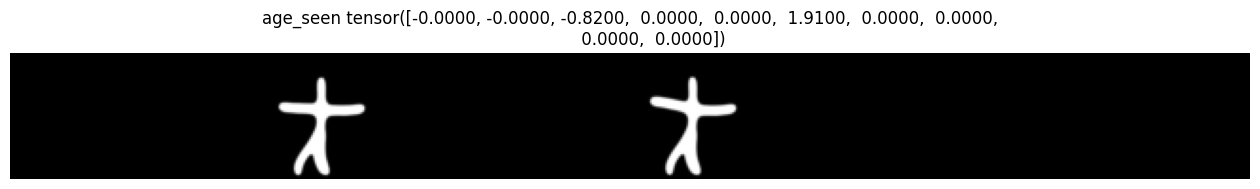

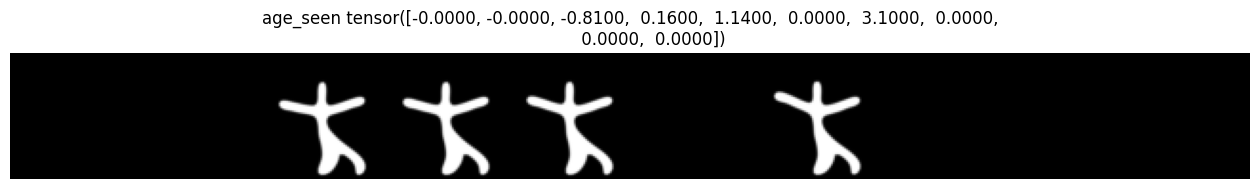

In [222]:
x = test_batch["x_origin"]
age = test_batch["age"]
x.shape


b, t, c, h, w = x.shape

perc_seen = 0.3
nb_seen = t * perc_seen

miss_past = 2
miss_future = 3

seen_mask = torch.full((b, t), 0.)
for i in range(b):
    seen_mask_i = seen_mask[i][miss_past:(t-miss_future)]
    while torch.all(seen_mask_i == 0.):
        seen_mask_i = torch.bernoulli(torch.full((t - miss_past - miss_future, ), perc_seen))
    
    seen_mask[i][miss_past:(t-miss_future)] = seen_mask_i

x_seen = x * rearrange(seen_mask, "b t-> b t 1 1 1")
age_seen = age * (seen_mask)
idx_seen = (torch.abs(age_seen) != 0.).float()

quick_plot_tensor(x_seen[0], f"age_seen {age_seen[0]}")
quick_plot_tensor(x_seen[4], f"age_seen {age_seen[4]}")

print(seen_mask)

tensor([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])


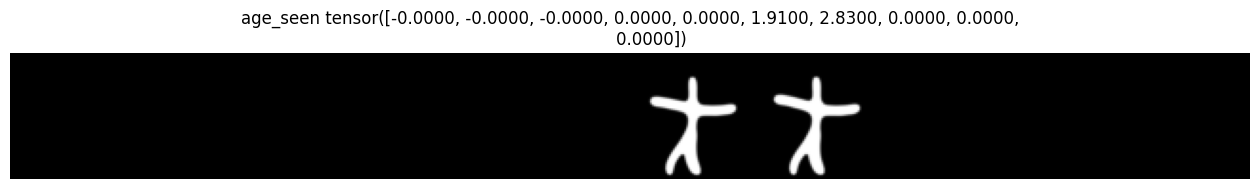

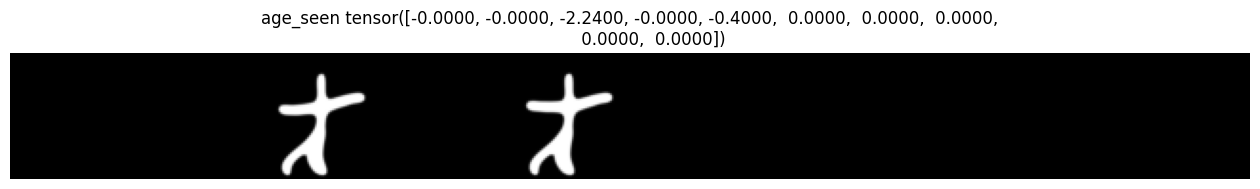

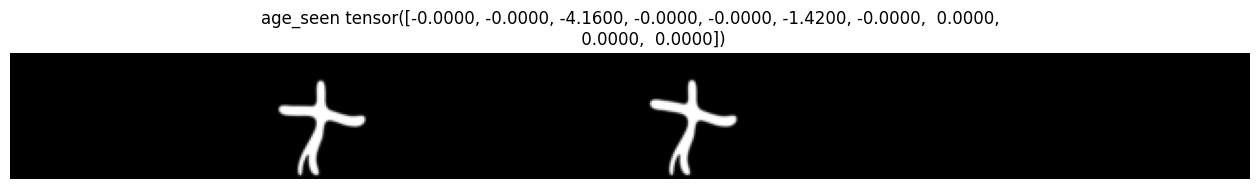

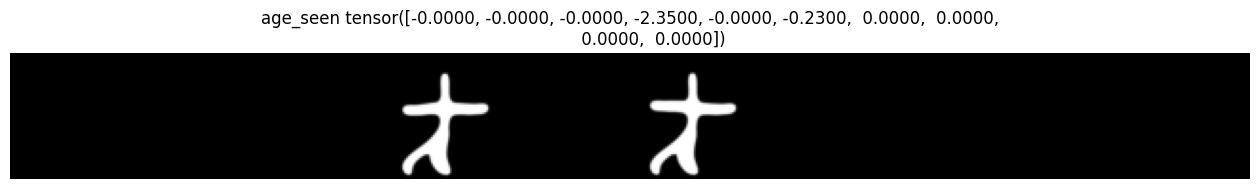

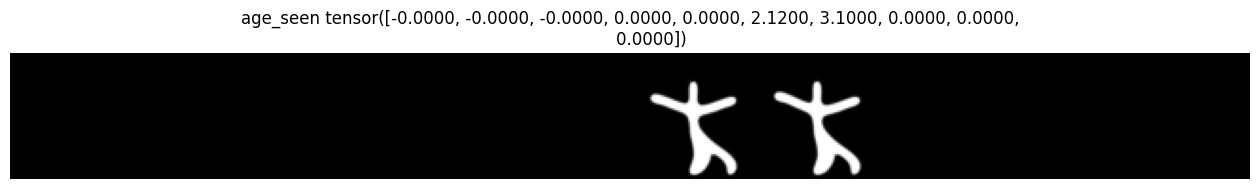

In [235]:
# Using class function

out = longitudinal_diff.mask_input_data(
    x=test_batch["x_origin"],
    age=test_batch["age"],
    perc_seen=0.3,
    miss_past=2,
    miss_future=3
)

x_seen = out["x_seen"]
age_seen = out["age_seen"]
seen_mask = out["idx_seen"]

for i in range(5):
    quick_plot_tensor(x_seen[i], f"age_seen {age_seen[i]}")

print(seen_mask)

## Func: Extract ysem from trained model

In [286]:
seen_mask.shape

torch.Size([10, 10])

In [287]:
out_ysem_seen = longitudinal_diff.extract_semantic_encoder(
    ids=test_batch["id"],
    x=x_seen,
    age=age_seen,
    mask=seen_mask,
    encoder=encoder
)

out_ysem_seen

{'ids': [array([979, 979]),
  array([878, 878]),
  array([42, 42]),
  array([956, 956]),
  array([612, 612]),
  array([311]),
  array([618]),
  array([895, 895]),
  array([284, 284]),
  array([217, 217, 217])],
 'ages': [tensor([1.9100, 2.8300]),
  tensor([-2.2400, -0.4000]),
  tensor([-4.1600, -1.4200]),
  tensor([-2.3500, -0.2300]),
  tensor([2.1200, 3.1000]),
  tensor([-2.0700]),
  tensor([-0.8900]),
  tensor([1.1800, 3.8500]),
  tensor([0.0500, 3.3000]),
  tensor([-3.1700, -2.0300, -0.8900])],
 'features': [tensor([[ 1.4367,  0.5167,  0.1857,  1.5035],
          [ 0.8002,  0.5158, -0.4346,  1.5045]]),
  tensor([[-0.2901,  0.5125, -0.1035,  1.5035],
          [ 0.1034,  0.5118,  1.4392,  1.5041]]),
  tensor([[ 1.3433,  0.5142, -0.0055,  1.5039],
          [-0.4958,  0.5152,  0.6681,  1.5048]]),
  tensor([[-0.2205,  0.5130, -0.1864,  1.5052],
          [ 0.2678,  0.5150,  1.4951,  1.5047]]),
  tensor([[ 1.3480,  0.5146, -0.0039,  1.5056],
          [ 0.5342,  0.5151, -0.4790,  1.5052

In [278]:
df_seen, ysem_seen_data, ysem_seen_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=out_ysem_seen["ids"],
    ages=out_ysem_seen["ages"],
    feats=out_ysem_seen["features"],
)

df_seen

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
979  1.91  1.436660  0.516694  0.185669  1.503507
     2.83  0.800221  0.515848 -0.434552  1.504544
878 -2.24 -0.290139  0.512536 -0.103541  1.503520
    -0.40  0.103384  0.511821  1.439209  1.504118
42  -4.16  1.343294  0.514193 -0.005522  1.503941
    -1.42 -0.495800  0.515221  0.668090  1.504773
956 -2.35 -0.220452  0.512961 -0.186391  1.505210
    -0.23  0.267798  0.514979  1.495120  1.504732
612  2.12  1.347979  0.514646 -0.003861  1.505571
     3.10  0.534176  0.515054 -0.479050  1.505175
311 -2.07 -0.384827  0.514356  0.039772  1.503667
618 -0.89 -0.282873  0.512942  1.148970  1.504034
895  1.18  1.418980  0.514472  0.899766  1.503268
     3.85 -0.156577  0.515678 -0.240850  1.503366
284  0.05  0.544922  0.515259  1.518111  1.504452
     3.30  0.335156  0.514565 -0.471640  1.504430
217 -3.17  0.522869  0.512668 -0.482634  1.505843
    -2.03 -0.403001  0.514809  0.077707  1.504889
    -0.89 -0.284983  0.513634  1.148357  1.504798

In [282]:
# Do the same for missing data
# invert the mask
missing_massk = 1. - seen_mask
missing_massk

out_ysem_miss = longitudinal_diff.extract_semantic_encoder(
    ids=test_batch["id"],
    x=test_batch["x_origin"],
    age=test_batch["age"],
    mask=1 - seen_mask,
    encoder=encoder
)

df_miss, ysem_miss_data, ysem_miss_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=out_ysem_miss["ids"],
    ages=out_ysem_miss["ages"],
    feats=out_ysem_miss["features"],
)

df_miss.loc[[979]]

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
979 -2.65  0.019853  0.525237 -0.359050  1.499221
    -1.74 -0.496830  0.514508  0.350408  1.504839
    -0.82 -0.239867  0.515372  1.201417  1.512453
     0.09  0.583811  0.516684  1.513971  1.500888
     1.00  1.334823  0.516559  1.058356  1.507266
     3.74 -0.072611  0.512523 -0.310539  1.504095
     4.65 -0.503978  0.510855  0.458443  1.505729
     5.57 -0.160805  0.514096  1.273262  1.501618

## init leaspy model

In [74]:
from leaspy.models import LogisticModel, LinearModel

enc_args

# pretrained_path = "workdir/debug/longitudinal_learning/leaspy_model/leaspy_model.json"
pretrained_path = None

model_leaspy = longitudinal_diff.init_leaspy_model(enc_args, leaspy_path=pretrained_path)
model_leaspy.is_initialized

model_leaspy = LinearModel(name="linear", source_dimension=enc_args["emb_chans"] - 1)
model_leaspy.is_initialized

False

# leaspy with normal cDDM


## load model

In [5]:
# Load model

# CondDDPM model

from src.ldae import CondDDPM
from lightning.pytorch.utilities.model_summary import ModelSummary
from einops import rearrange


WORK_DIR = "workdir/diffae_starmen"
# WORK_DIR = "workdir/debug"

## Load model
ckpt_path = os.path.join(WORK_DIR, "representation-learning", "checkpoints", "best.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = CondDDPM.load_from_checkpoint(ckpt_path, map_location=device)
encoder = diffae_litmodel.ema_encoder
encoder.eval()
ema_decoder = diffae_litmodel.ema_decoder
ema_decoder.eval()
gaussian_diffusion = diffae_litmodel.gaussian_diffusion

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)


Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

  | Name        | Type            | Params | Mode 
--------------------------------------------------------
0 | decoder     | CondUNet        | 2.5 M  | train
1 | encoder     | SemanticEncoder | 24.6 M | train
2 | ema_encoder | SemanticEncoder | 24.6 M | eval 
3 | ema_decoder | CondUNet        | 2.5 M  | eval 
--------------------------------------------------------
27.1 M    Trainable params
27.1 M    Non-trainable params
54.1 M    Total params
216.547   Total estimated model params size (MB)
492       Modules in train mode
492       Modules in eval mode


In [12]:
ema_decoder.input_blocks[3]

TimestepSequential(
  (0): ResBlockShift(
    (in_layers): Sequential(
      (0): GroupNorm(32, 32, eps=1e-05, affine=True)
      (1): SiLU()
      (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (h_upd): Identity()
    (x_upd): Identity()
    (emb_layers): Sequential(
      (0): SiLU()
      (1): Linear(in_features=128, out_features=128, bias=True)
    )
    (emb_z_layers): Sequential(
      (0): SiLU()
      (1): Linear(in_features=128, out_features=128, bias=True)
    )
    (out_layers): Sequential(
      (0): GroupNorm(32, 64, eps=1e-05, affine=True)
      (1): SiLU()
      (2): Dropout(p=0.0, inplace=False)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (skip_connection): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): AttentionBlock(
    (norm): GroupNorm(32, 64, eps=1e-05, affine=True)
    (qkv): Conv1d(64, 192, kernel_size=(1,), stride=(1,))
    (attention): QKVAttentionLegacy()
    (proj_out)

In [6]:
from leaspy.models import LogisticModel, LinearModel

model_leaspy = LinearModel(name="linear", source_dimension=3)
model_leaspy.is_initialized

False

In [7]:
from src.ldae.diffusion.longitudinal_diffusion import LongitudinalDiffusion

longitudinal_diff = LongitudinalDiffusion(device=torch.device("cpu"))

## build dataset ysem from trained encoder

In [12]:
# Use class function

limit = 10

train_df, train_data, train_dataset = longitudinal_diff.extract_semantic_encoder_dataloader(
    train_loader, 
    encoder, 
    limit,
    use_age_cond=False)

len(train_dataset.indices)

100

In [18]:
test_idx = train_dataset.indices[:5]
test_idx

['515', '284', '241', '698', '624']

## train leaspy with ysem

In [14]:
train_dataset.move_to_device(device)

model_leaspy.move_to_device(device)

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
algo_settings.set_logs(path=None)    

model_leaspy.fit(train_dataset, algorithm_settings=algo_settings)

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)


 ==> Setting seed to 42
|##------------------------------------------------|   4/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/models/utilities.py:361: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['dim_1', 'dim_3']: not properly handled in model...
  warnings.warn(
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/torch/__init__.py:1240: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 9s


## personalize

In [21]:
test_idx

settings_personalization = AlgorithmSettings(
    "scipy_minimize", progress_bar=True, use_jacobian=False
)
ysem_ips = model_leaspy.personalize(
    train_df.loc[test_idx], 
    algorithm_settings=settings_personalization
)

|#####|   5/5 subjects

Personalize with `scipy_minimize` took: 2s


## plotting

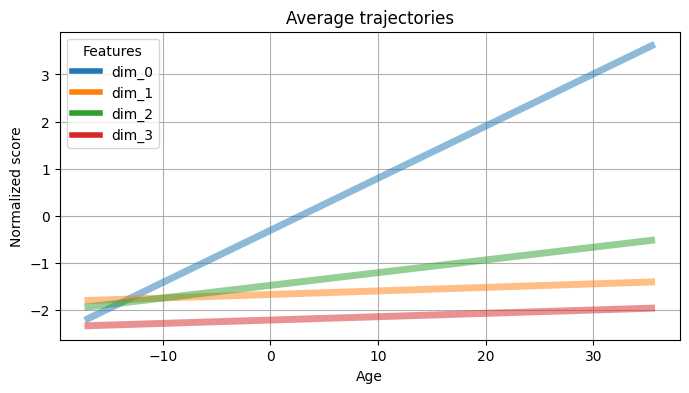

In [16]:
from leaspy.io.logs.visualization import Plotter, Plotting

# Average trajectory

model_plt = Plotting(model=model_leaspy)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()

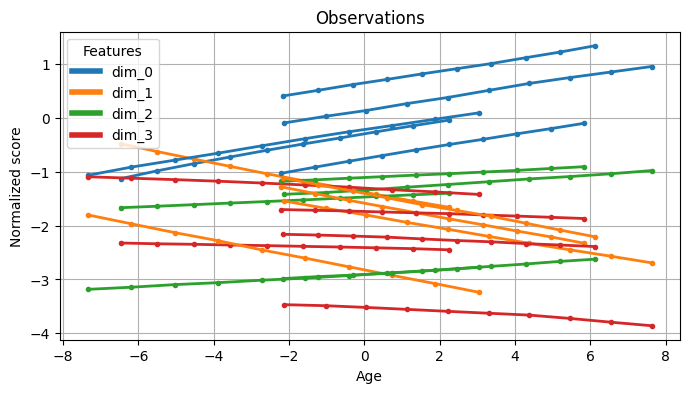

In [19]:
# Patient trajectory

ax = model_plt.patient_observations(train_data, test_idx)
ax.grid()
plt.show()

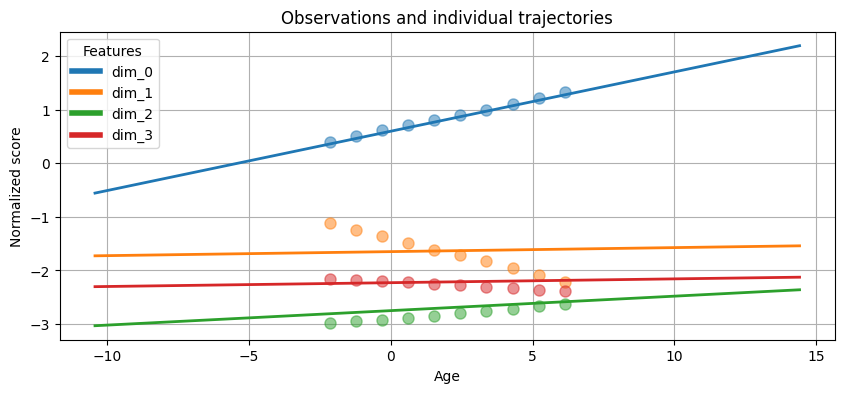

In [22]:
ax = model_plt.patient_trajectories(
    train_data,
    ysem_ips,
    patients_idx=test_idx[3],
    labels=list(train_df.columns),
    # reparametrized_ages=True, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=1,
    factor_future=1,  # future extrapolation
)
ax.grid()
# ax.set_xlim(-10, 10)
plt.show()

## DDPM sampling

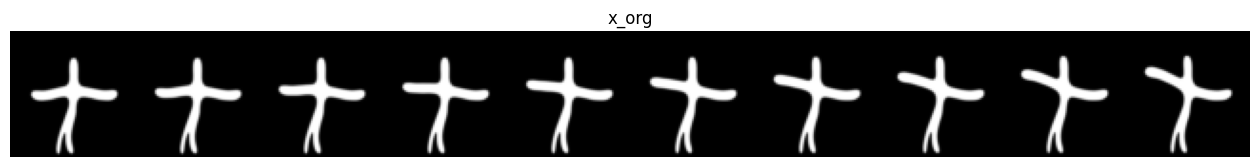

In [62]:
p_idx = 1

x_orgs = test_batch["x_origin"]
x_orgs.shape

x_org = x_orgs[p_idx]
quick_plot_tensor(x_org, "x_org")

sampling loop time step: 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]


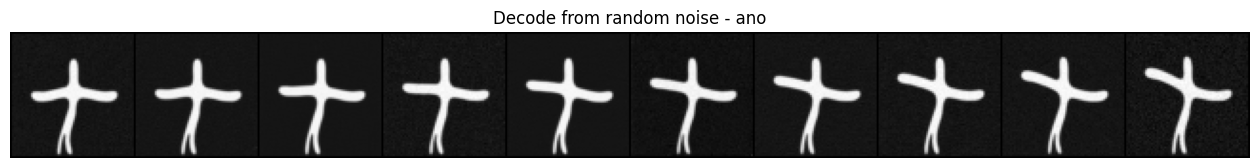

In [63]:
# Reconsutruction from random noise UNet
b, c, h, w = x_org.shape

with torch.no_grad():
    x_recon = gaussian_diffusion.representation_learning_diffae_sample(
        ddim_style="ddim10",
        encoder=encoder,
        unet=ema_decoder,
        x_0=x_org,
        # z=ysem_seen,
        x_T=torch.randn_like(x_org),
        disable_tqdm=False
    )

quick_plot_tensor(x_recon, title="Decode from random noise - ano")

sampling loop time step: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]


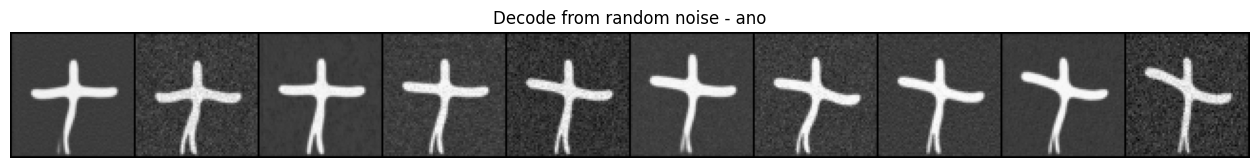

In [65]:
# Modify slightly 

ysem_true = encoder(x_org)
ysem_true.shape

ysem_new = ysem_true + torch.randn_like(ysem_true)
ysem_new.shape

with torch.no_grad():
    x_recon = gaussian_diffusion.representation_learning_diffae_sample(
        ddim_style="ddim10",
        encoder=encoder,
        unet=ema_decoder,
        x_0=x_org,
        z=ysem_new,
        x_T=torch.randn_like(x_org),
        disable_tqdm=False
    )

quick_plot_tensor(x_recon, title="Decode from random noise - ano")

# leaspy with longitudinal DDPM

## load model

In [44]:
# Load model

# CondDDPM model

from src.ldae import CondDDPM
from lightning.pytorch.utilities.model_summary import ModelSummary
from einops import rearrange


WORK_DIR = "workdir/diffae_starmen_dim4"
# WORK_DIR = "workdir/debug"

## Load model
ckpt_path = os.path.join(WORK_DIR, "longitudinal_learning", "checkpoints", "best-v2.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = CondDDPM.load_from_checkpoint(ckpt_path, map_location=device)
encoder = diffae_litmodel.ema_encoder
encoder.eval()
ema_decoder = diffae_litmodel.ema_decoder
ema_decoder.eval()
gaussian_diffusion = diffae_litmodel.gaussian_diffusion

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

  | Name        | Type            | Params | Mode 
--------------------------------------------------------
0 | decoder     | CondUNet        | 2.5 M  | train
1 | encoder     | SemanticEncoder | 23.5 M | train
2 | ema_encoder | SemanticEncoder | 23.5 M | eval 
3 | ema_decoder | CondUNet        | 2.5 M  | eval 
--------------------------------------------------------
26.0 M    Trainable params
26.0 M    Non-trainable params
51.9 M    Total params
207.700   Total estimated model params size (MB)
492       Modules in train mode
492       Modules in eval mode


## DDPM sampling

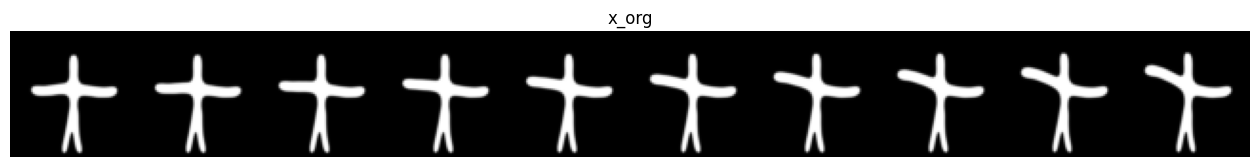

In [49]:
p_idx = 0

x_orgs = test_batch["x_origin"]
x_orgs.shape

x_org = x_orgs[p_idx]
quick_plot_tensor(x_org, "x_org")

sampling loop time step: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


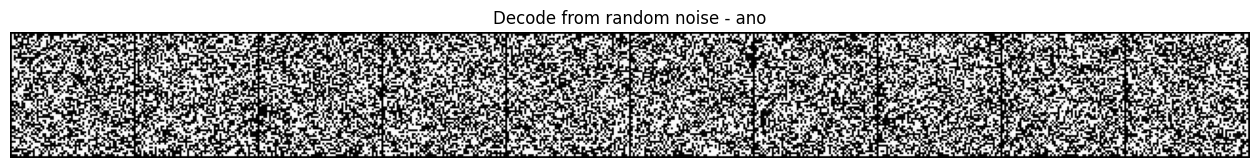

In [50]:
# Reconsutruction from random noise UNet
b, c, h, w = x_org.shape

with torch.no_grad():
    x_recon = gaussian_diffusion.representation_learning_diffae_sample(
        ddim_style="ddim10",
        encoder=encoder,
        unet=ema_decoder,
        x_0=x_org,
        # z=ysem_seen,
        x_T=torch.randn_like(x_org),
        disable_tqdm=False
    )

quick_plot_tensor(x_recon, title="Decode from random noise - ano")

## Build dataset from whole train dataset

In [278]:
# Semantic encoder for 1 batch
out_batch = longitudinal_diff.extract_semantic_encoder_one_batch(
    test_batch["id"],
    test_batch["x_origin"],
    test_batch["age"],
    mask=None, 
    encoder=encoder,
    use_age_cond=True
)

out_batch["ages"]
cond = out_batch["features"]
len(cond)
cond[0].shape
cond_t = torch.concat(cond)
cond_t.shape

torch.Size([100, 4])

In [45]:
# Use class function

limit = 10

train_df, train_data, train_dataset = longitudinal_diff.extract_semantic_encoder_dataloader(
    train_loader, 
    encoder, 
    limit,
    use_age_cond=False)

len(train_dataset.indices)

100

In [47]:
train_df.loc[train_dataset.indices[:2]]

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
700 -5.96  0.334356  0.775522  1.197696 -1.176631
    -5.01  0.260082  0.765775  1.081447 -1.161860
    -4.07  0.272220  0.863724  0.988437 -1.018679
    -3.12  0.208093  0.999022  0.802560 -0.814517
    -2.18  0.183348  1.034287  0.862575 -0.849999
    -1.24  0.129473  0.995718  0.893471 -0.904888
    -0.29  0.127580  0.938618  0.862213 -0.798041
     0.65  0.176498  0.934573  0.803068 -0.707687
     1.60  0.111987  0.931422  0.854737 -0.856950
     2.54  0.005440  0.961090  0.790322 -0.928834
954 -5.92  0.118836  1.046715  0.784267 -0.917837
    -4.82  0.195653  0.978351  0.970885 -0.977875
    -3.72  0.244149  0.934158  0.983938 -0.886342
    -2.62  0.231645  0.861942  1.059611 -0.867306
    -1.52  0.160522  0.899266  1.187168 -0.881405
    -0.42  0.148035  0.899133  1.122613 -0.876540
     0.67  0.133926  0.891931  1.195399 -0.907671
     1.77  0.095454  0.939719  1.238440 -0.950669
     2.87  0.037424  0.961803  1.257492 -1.029839
     3.97 -0.058603  1.076137  1.100871 -1.061810

### Plot individual ysem dim

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


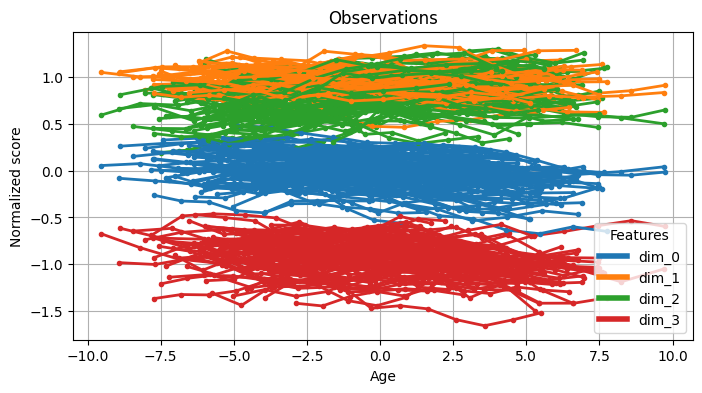

In [48]:
from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model_leaspy)

test_indices = train_dataset.indices[1]

ax = model_plt.patient_observations(train_data, "all")
ax.grid()
plt.show()

## Train leaspy model on small train dataset 

In [290]:
train_dataset.move_to_device(device)

model_leaspy.move_to_device(device)

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
algo_settings.set_logs(path=None)    

model_leaspy.fit(train_dataset, algorithm_settings=algo_settings)

 ==> Setting seed to 42
|###-----------------------------------------------|   6/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 10s


### Plot train ds

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


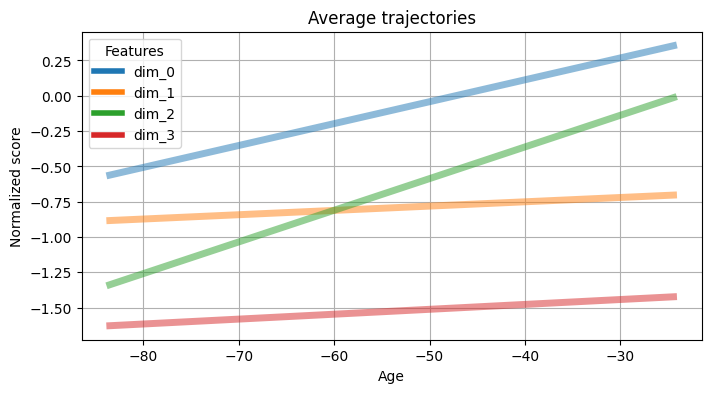

In [291]:
from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model_leaspy)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()


### Comparison between expected position and ysem

In [292]:
test_indices = train_dataset.indices[:5]
test_indices

['191', '943', '792', '104', '40']

In [293]:
settings_personalization = AlgorithmSettings(
    "scipy_minimize", progress_bar=True, use_jacobian=False
)
ysem_ips = model_leaspy.personalize(
    train_df.loc[test_indices], 
    algorithm_settings=settings_personalization
)


|#####|   5/5 subjects

Personalize with `scipy_minimize` took: 2s


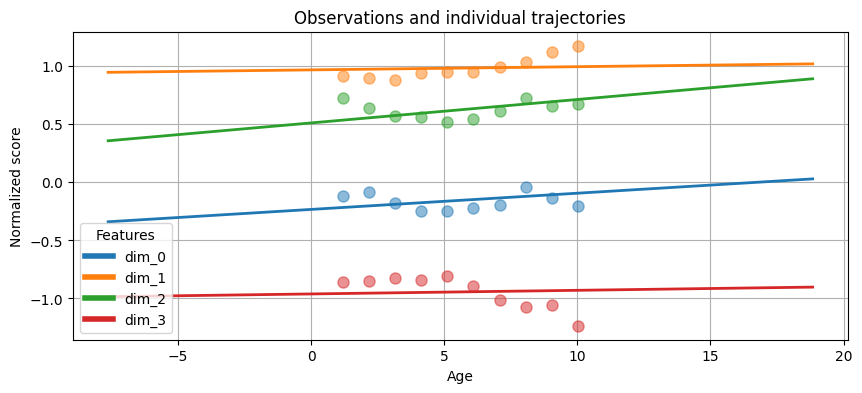

In [296]:

ax = model_plt.patient_trajectories(
    train_data,
    ysem_ips,
    patients_idx=test_indices[3],
    labels=list(train_df.columns),
    # reparametrized_ages=True, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=1,
    factor_future=1,  # future extrapolation
)
ax.grid()
# ax.set_xlim(-10, 10)
plt.show()

## imput missing data with trained leaspy model

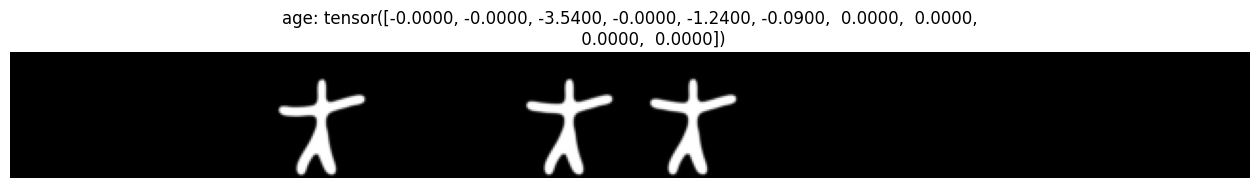

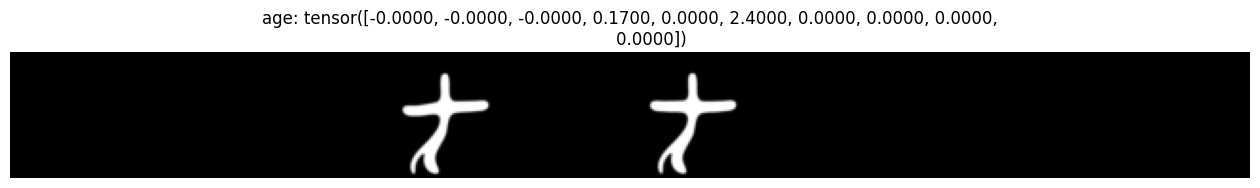

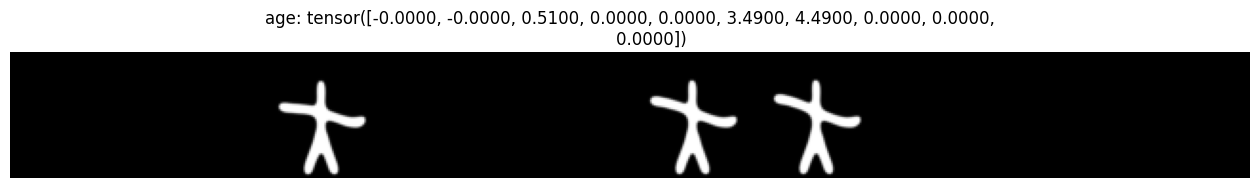

In [303]:
test_batch = first(iter(train_loader))
test_batch

out = longitudinal_diff.mask_input_data(
    x=test_batch["x_origin"],
    age=test_batch["age"],
    perc_seen=0.6
)

x_seen = out["x_seen"]
age_seen = out["age_seen"]
seen_mask = out["idx_seen"]

for i in range(3):
    quick_plot_tensor(x_seen[i], f"age: {age_seen[i]}")

In [304]:
# Personalize with seen data
ysem_seen = longitudinal_diff.extract_semantic_encoder_one_batch(
    ids=test_batch["id"],
    x=x_seen,
    age=age_seen,
    mask=seen_mask,
    encoder=encoder
)

df_seen, seen_data, seen_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=ysem_seen["ids"],
    ages=ysem_seen["ages"],
    feats=ysem_seen["features"]
)

settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True, use_jacobian=False)
ysem_ips = model_leaspy.personalize(seen_dataset, algorithm_settings=settings_personalization)

|##########|   10/10 subjects

Personalize with `scipy_minimize` took: 5s


In [305]:
# Impute missing data
ysem_miss = longitudinal_diff.extract_semantic_encoder_one_batch(
    ids=test_batch["id"],
    x=test_batch["x_origin"],
    age=test_batch["age"],
    mask=1-seen_mask,
    encoder=encoder
)

df_miss, miss_data, miss_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=ysem_miss["ids"],
    ages=ysem_miss["ages"],
    feats=ysem_miss["features"]
)


df_miss.index
ysem_pred = model_leaspy.estimate(df_miss.index, ysem_ips)
# ysem_pred = torch.tensor(ysem_pred.to_numpy(), device=device)
# ysem_pred.shape
ysem_pred

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
36  -5.83 -0.005290  0.995795  0.755205 -1.000844
    -4.68  0.013362  0.999464  0.782176 -0.996672
    -2.39  0.050503  1.006770  0.835884 -0.988365
     1.05  0.106295  1.017745  0.916563 -0.975886
     2.20  0.124947  1.021414  0.943534 -0.971714
...             ...       ...       ...       ...
704 -3.58 -0.183955  0.921829  0.581037 -1.240821
     1.83 -0.104289  0.937501  0.696238 -1.223002
     3.19 -0.084262  0.941440  0.725198 -1.218523
     4.54 -0.064382  0.945351  0.753945 -1.214076
     5.89 -0.044503  0.949261  0.782692 -1.209630

[71 rows x 4 columns]

## Alligment loss

In [306]:
ysem_miss = torch.tensor(df_miss.to_numpy(), device=device)
ysem_miss.shape

ysem_pred_ts = torch.tensor(ysem_pred.to_numpy(), device=device)
ysem_pred_ts.shape

loss_align = torch.sum((ysem_miss - ysem_pred_ts) ** 2)
loss_align

tensor(6.1051)

In [301]:
miss_dataset.indices

['37', '38', '709', '498', '657', '166', '933', '577', '508', '680']

### Plot

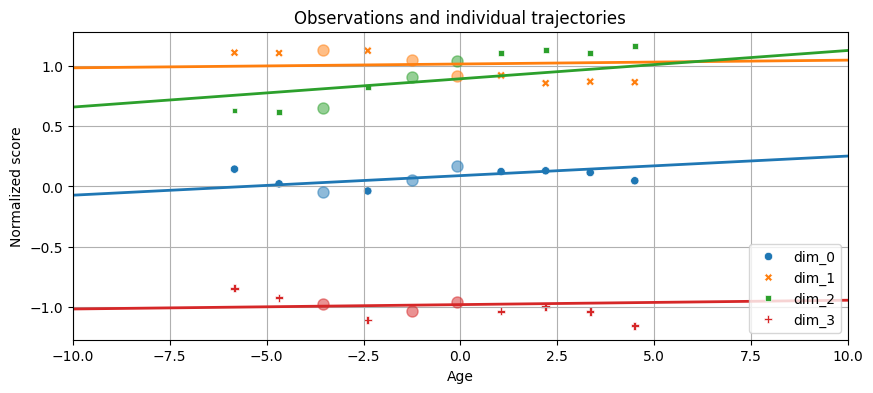

In [307]:
test_idx = miss_dataset.indices[0]

ax = model_plt.patient_trajectories(
    seen_data,
    ysem_ips,
    patients_idx=[test_idx],
    labels=list(df_seen.columns),
    # reparametrized_ages=True, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=2,
    factor_future=3,  # future extrapolation
)

# sns.scatterplot(data=ysem_pred.loc['469'], ax=ax)
sns.scatterplot(data=df_miss.loc[test_idx], ax=ax)


ax.grid()
ax.plot()
ax.set_xlim(-10, 10)
plt.show()

In [ ]:
# timepoints = np.linspace(60, 100, 100)
# reconstruction = leaspy.estimate({'GS-187': timepoints}, ip)

# def plot_trajectory(timepoints, reconstruction, observations=None):

#     if observations is not None:
#         ages = observations.index.values
    
#     plt.figure(figsize=(14, 6))
#     plt.grid()
#     plt.ylim(0, .75)
#     plt.ylabel('Biomarker normalized value')
#     plt.xlim(60, 100)
#     plt.xlabel('Patient age')
#     colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
    
#     for c, name, val in zip(colors, leaspy.model.features, reconstruction.T):
#         plt.plot(timepoints, val, label=name, c=c, linewidth=3)
#         if observations is not None:
#             plt.plot(ages, observations[name], c=c, marker='o', markersize=12)
        
#     plt.legend()
#     plt.show()
                                
# plot_trajectory(timepoints, reconstruction['GS-187'], observations)

# Train leaspy on full train dataset

## Load leaspy model

In [360]:
from src.ldae.diffusion.longitudinal_diffusion import LongitudinalDiffusion
from leaspy.models import LogisticModel, LinearModel

longitudinal_diff = LongitudinalDiffusion(device=torch.device("cpu"))

enc_args

# pretrained_path = "workdir/debug/longitudinal_learning/leaspy_model/leaspy_model.json"
pretrained_path = None

model_leaspy = longitudinal_diff.init_leaspy_model(enc_args, leaspy_path=pretrained_path)
model_leaspy.is_initialized

model_leaspy = LinearModel(name="linear", source_dimension=enc_args["emb_chans"] - 1)
model_leaspy.is_initialized

False

In [361]:
limit = None

train_df, train_data, train_dataset = longitudinal_diff.extract_semantic_encoder_dataloader(
    train_loader, 
    encoder, 
    limit,
    use_age_cond=False)

len(train_dataset.indices)

700

## Train leaspy model

In [362]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataset.move_to_device(device)

model_leaspy.move_to_device(device)

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
algo_settings.set_logs(path=None)    

model_leaspy.fit(train_dataset, algorithm_settings=algo_settings)

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)


 ==> Setting seed to 42
|##------------------------------------------------|   4/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/models/utilities.py:361: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['dim_0', 'dim_1', 'dim_3']: not properly handled in model...
  warnings.warn(


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 11s


# Imputing missing image


## Setting up data and model

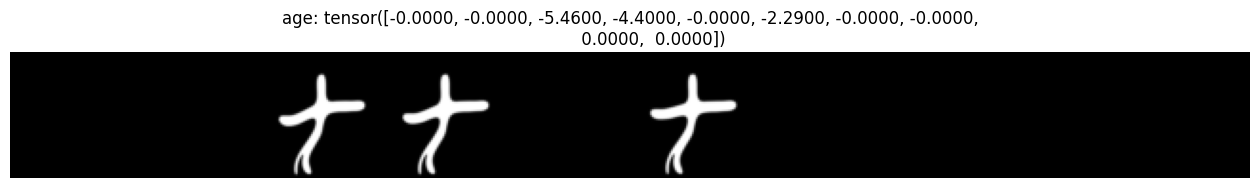

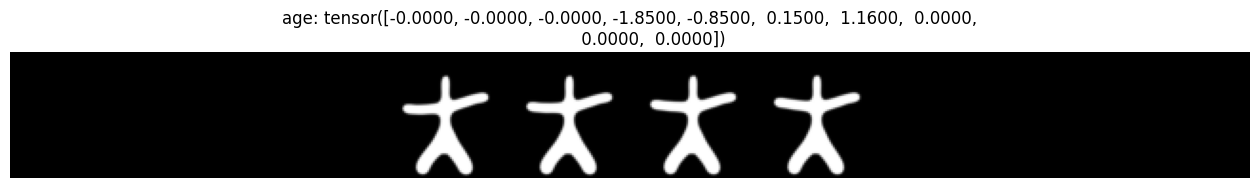

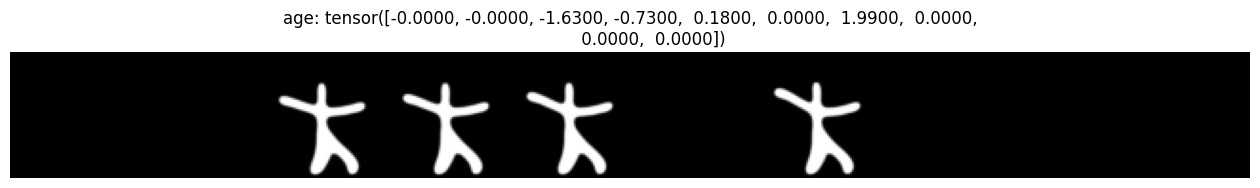

In [363]:
test_batch = first(iter(train_loader))
test_batch

out = longitudinal_diff.mask_input_data(
    x=test_batch["x_origin"],
    age=test_batch["age"],
    perc_seen=0.6
)

x_seen = out["x_seen"]
age_seen = out["age_seen"]
seen_mask = out["idx_seen"]

for i in range(3):
    quick_plot_tensor(x_seen[i], f"age: {age_seen[i]}")

In [364]:
# patient_id = 3

# x_seen = out["x_seen"][patient_id]
# age_seen = out["age_seen"][patient_id]
# seen_mask = out["idx_seen"][patient_id]

print(f"x_seen: {x_seen.shape}")
print(f"age_seen: {age_seen.shape}")
print(f"seen_mask: {seen_mask.shape}")

x_seen: torch.Size([10, 10, 1, 64, 64])
age_seen: torch.Size([10, 10])
seen_mask: torch.Size([10, 10])


## Personalize with seen data

In [365]:
# Personalize with seen data
ysem_seen = longitudinal_diff.extract_semantic_encoder_one_batch(
    ids=test_batch["id"],
    x=x_seen,
    age=age_seen,
    mask=seen_mask,
    encoder=encoder
)

df_seen, seen_data, seen_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=ysem_seen["ids"],
    ages=ysem_seen["ages"],
    feats=ysem_seen["features"]
)

settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True, use_jacobian=False)
ysem_ips = model_leaspy.personalize(seen_dataset, algorithm_settings=settings_personalization)

|##########|   10/10 subjects

Personalize with `scipy_minimize` took: 5s


In [366]:
df_seen

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
405 -5.46 -0.233131  0.865249  0.427521 -0.916324
    -4.40 -0.232250  0.824659  0.443661 -0.869221
    -2.29 -0.103628  0.874649  0.484742 -0.812639
500 -1.85 -0.022901  0.997781  0.804741 -1.081125
    -0.85 -0.001094  0.910146  0.744734 -1.020870
     0.15  0.063301  0.815745  0.825116 -0.932746
     1.16  0.106846  0.838574  0.880377 -0.879338
702 -1.63 -0.122531  0.988369  0.889237 -1.071042
    -0.73 -0.194144  1.048053  0.863418 -1.016327
     0.18 -0.287096  1.022421  0.880139 -1.142417
     1.99 -0.352684  1.013676  0.757223 -1.095739
224 -2.99  0.047071  0.833714  0.843843 -0.907320
    -1.76  0.000452  0.798364  0.841788 -0.911089
     0.69 -0.123634  0.834625  0.850738 -1.008559
     1.91 -0.219758  0.891018  0.860187 -1.080884
881 -0.50  0.015442  1.007380  0.677408 -1.120116
     2.18  0.008959  1.021278  0.641607 -0.889325
     3.52 -0.059670  1.039225  0.584022 -0.800126
743 -5.01  0.004945  0.912762  0.386231 -0.682592
    -3.98  0.043517  0.924250  0.470169 -0.776238
    -2.95  0.041319  0.892408  0.453303 -0.795475
220  2.69 -0.084551  0.978666  0.761053 -0.932522
     3.84 -0.135960  0.950208  0.714215 -0.932611
     4.98 -0.085952  0.908600  0.800682 -0.949457
1   -4.57  0.108136  1.053752  0.540917 -0.900385
    -3.58  0.079235  1.039524  0.676336 -0.993018
    -1.61  0.073239  1.048352  0.810877 -0.857895
    -0.62  0.093286  1.025993  0.838589 -0.790431
568 -0.42  0.080895  0.800055  0.993909 -0.981674
     1.40  0.157603  0.710177  0.956422 -0.898988
     2.31  0.155966  0.712445  0.901106 -0.877220
476  1.27  0.125266  1.109789  0.974960 -0.734654
     3.68 -0.055400  1.224908  0.797663 -0.890903
     4.89 -0.106162  1.125361  0.795888 -0.914364
     6.10 -0.240427  1.083680  0.907134 -1.221444

## Impute missing data

In [367]:
# Impute missing data
ysem_miss = longitudinal_diff.extract_semantic_encoder_one_batch(
    ids=test_batch["id"],
    x=test_batch["x_origin"],
    age=test_batch["age"],
    mask=1-seen_mask,
    encoder=encoder
)

df_miss, miss_data, miss_dataset = longitudinal_diff.create_leaspy_dataset(
    ids=ysem_miss["ids"],
    ages=ysem_miss["ages"],
    feats=ysem_miss["features"]
)


df_miss.index
ysem_pred = model_leaspy.estimate(df_miss.index, ysem_ips)
ysem_pred

dim_0     dim_1     dim_2     dim_3
ID  TIME                                         
405 -7.57 -0.185697  0.858303  0.386313 -0.907492
    -6.52 -0.179461  0.862067  0.407104 -0.902928
    -3.35 -0.160631  0.873431  0.469870 -0.889149
    -1.23 -0.148038  0.881030  0.511846 -0.879934
    -0.18 -0.141802  0.884794  0.532636 -0.875370
...             ...       ...       ...       ...
476  0.06 -0.079479  1.078643  0.832016 -0.945551
     2.48 -0.073466  1.082272  0.852059 -0.941151
     7.30 -0.061491  1.089499  0.891977 -0.932387
     8.51 -0.058485  1.091313  0.901998 -0.930187
     9.72 -0.055478  1.093128  0.912019 -0.927987

[65 rows x 4 columns]

## 1 example


torch.Size([3, 4])

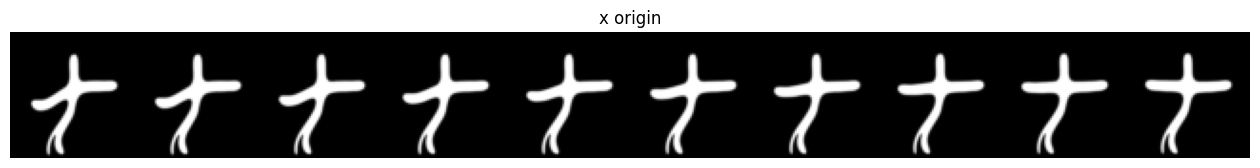

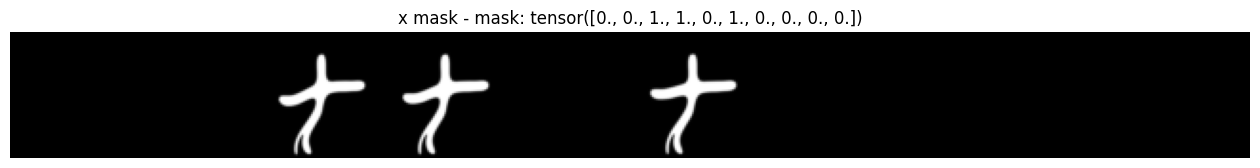

In [368]:
p_idx = miss_dataset.indices[0]
t_ysem_pred = ysem_pred.loc[str(p_idx)].to_numpy()
t_ysem_pred = torch.tensor(t_ysem_pred)

# Original masked image sequence
x_org = test_batch["x_origin"][0]
quick_plot_tensor(x_org, "x origin")

x_masked = x_seen[0]
mask = seen_mask[0]
quick_plot_tensor(x_masked, f"x mask - mask: {mask}")
ysem_seen = df_seen.loc[p_idx].to_numpy()
ysem_seen = torch.tensor(ysem_seen)
ysem_seen.shape

sampling loop time step: 100%|██████████| 100/100 [00:38<00:00,  2.62it/s]


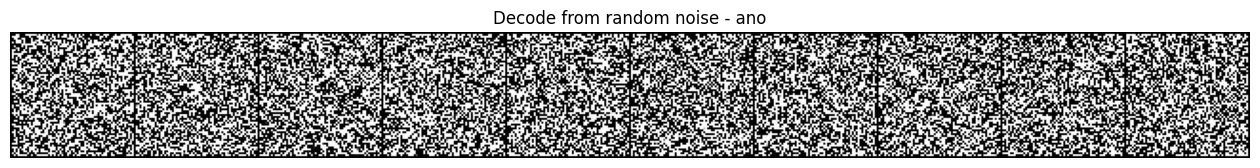

In [370]:
# Reconsutruction from random noise UNet
b, c, h, w = x_org.shape

with torch.no_grad():
    x_recon = gaussian_diffusion.representation_learning_diffae_sample(
        ddim_style="ddim100",
        encoder=encoder,
        unet=ema_decoder,
        x_0=x_org,
        # z=ysem_seen,
        x_T=torch.randn_like(x_org),
        disable_tqdm=False
    )

quick_plot_tensor(x_recon, title="Decode from random noise - ano")

# Normal representation learning model

In [33]:
# Load model

# CondDDPM model

from src.ldae import CondDDPM
from lightning.pytorch.utilities.model_summary import ModelSummary
from einops import rearrange


WORK_DIR = "workdir/diffae_starmen_dim4"
# WORK_DIR = "workdir/debug"

## Load model
ckpt_path = os.path.join(WORK_DIR, "representation-learning", "checkpoints", "best.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = CondDDPM.load_from_checkpoint(ckpt_path, map_location=device)
ema_encoder = diffae_litmodel.ema_encoder
ema_encoder.eval()
ema_decoder = diffae_litmodel.ema_decoder
ema_decoder.eval()
gaussian_diffusion = diffae_litmodel.gaussian_diffusion

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

  | Name        | Type            | Params | Mode 
--------------------------------------------------------
0 | decoder     | CondUNet        | 2.5 M  | train
1 | encoder     | SemanticEncoder | 23.5 M | train
2 | ema_encoder | SemanticEncoder | 23.5 M | eval 
3 | ema_decoder | CondUNet        | 2.5 M  | eval 
--------------------------------------------------------
26.0 M    Trainable params
26.0 M    Non-trainable params
51.9 M    Total params
207.700   Total estimated model params size (MB)
492       Modules in train mode
492       Modules in eval mode


sampling loop time step: 100%|██████████| 50/50 [00:18<00:00,  2.68it/s]


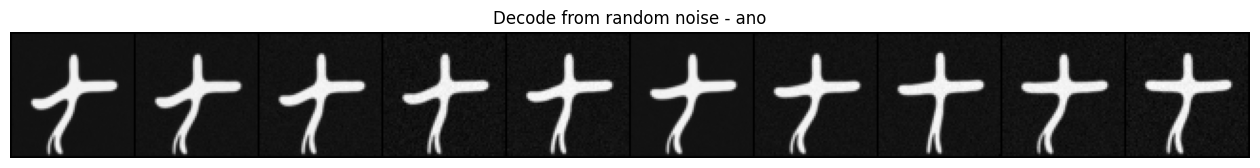

In [379]:
with torch.no_grad():
    x_recon = gaussian_diffusion.representation_learning_diffae_sample(
        ddim_style="ddim50",
        encoder=ema_encoder,
        unet=ema_decoder,
        x_0=x_org,
        # z=ysem_seen,
        x_T=torch.randn_like(x_org),
        disable_tqdm=False
    )

quick_plot_tensor(x_recon, title="Decode from random noise - ano")

## extract ysem

In [ ]:
# Use class function

limit = 20

train_df, train_data, train_dataset = longitudinal_diff.extract_semantic_encoder_dataloader(
    train_loader, 
    ema_encoder, 
    limit,
    use_age_cond=False)

len(train_dataset.indices)

200

In [383]:
from leaspy.models import LogisticModel, LinearModel

enc_args

# pretrained_path = "workdir/debug/longitudinal_learning/leaspy_model/leaspy_model.json"

model_leaspy2 = LinearModel(name="linear", source_dimension=enc_args["emb_chans"] - 1)
model_leaspy2.is_initialized

False

## Fit with leaspy

In [384]:
train_dataset.move_to_device(device)

model_leaspy2.move_to_device(device)

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
algo_settings.set_logs(path=None)    

model_leaspy2.fit(train_dataset, algorithm_settings=algo_settings)

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)


 ==> Setting seed to 42
|###-----------------------------------------------|   6/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/models/utilities.py:361: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['dim_1', 'dim_3']: not properly handled in model...
  warnings.warn(


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 9s


/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


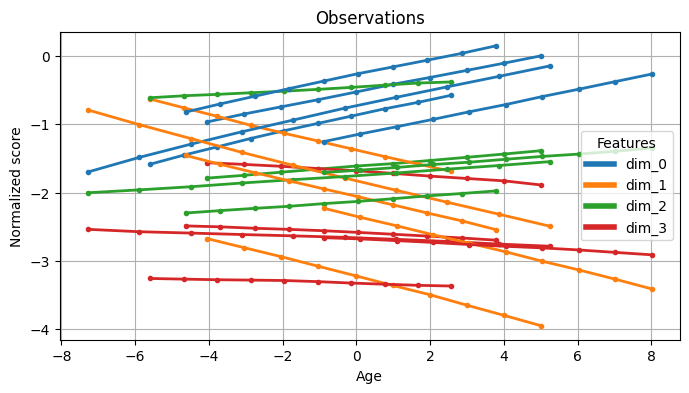

In [386]:
model_plt = Plotting(model=model_leaspy2)

ax = model_plt.patient_observations(train_data, train_dataset.indices[:5])
ax.grid()
plt.show()

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


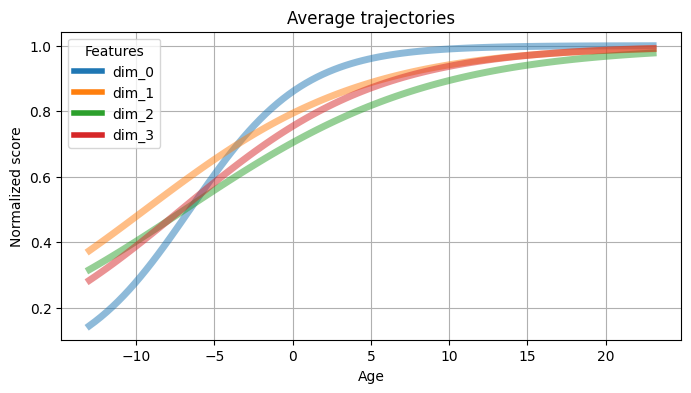

In [168]:
from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model_leaspy)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()


# leaspy with anomaly score


## load trained model

In [34]:
# CondDDPM model

from src.ldae import CondDDPM
from lightning.pytorch.utilities.model_summary import ModelSummary

DATA_DIR = "data/starmen/output_random_noacc"
WORK_DIR = "workdir/diffae_starmen"

## Load model
ckpt_path = os.path.join(WORK_DIR, "representation-learning", "checkpoints", "best.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = CondDDPM.load_from_checkpoint(ckpt_path, map_location=device)
ema_encoder = diffae_litmodel.ema_encoder
ema_encoder.eval()
ema_decoder = diffae_litmodel.ema_decoder
ema_decoder.eval()
gaussian_diffusion = diffae_litmodel.gaussian_diffusion

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

  | Name        | Type            | Params | Mode 
--------------------------------------------------------
0 | decoder     | CondUNet        | 2.5 M  | train
1 | encoder     | SemanticEncoder | 24.6 M | train
2 | ema_encoder | SemanticEncoder | 24.6 M | eval 
3 | ema_decoder | CondUNet        | 2.5 M  | eval 
--------------------------------------------------------
27.1 M    Trainable params
27.1 M    Non-trainable params
54.1 M    Total params
216.547   Total estimated model params size (MB)
492       Modules in train mode
492       Modules in eval mode


## fine tuned FE model

In [35]:
# Fine-tuned feature extractor model

from src.ldae import CondDDPM, FeatureExtractorLitmodel
from lightning.pytorch.utilities.model_summary import ModelSummary


## Load model
ckpt_path = os.path.join(WORK_DIR, "fe-train", "checkpoints", "best.ckpt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

diffae_litmodel = FeatureExtractorLitmodel.load_from_checkpoint(ckpt_path, map_location=device)

ema_encoder = diffae_litmodel.encoder
ema_encoder.eval()
ema_decoder = diffae_litmodel.unet
ema_decoder.eval()
fe = diffae_litmodel.fe
fe = fe.float()
fe.eval()

# Model summary

summary = ModelSummary(diffae_litmodel, max_depth=1)
print(summary)

Backbone model loaded successfully.
Frozen first 0 layers out of 161 in the backbone

Freeze ema_encoder from DDPM models.
Delete litmodel. Only keep UNet and Encoder
  | Name    | Type             | Params | Mode
----------------------------------------------------
0 | encoder | SemanticEncoder  | 24.6 M | eval
1 | unet    | CondUNet         | 2.5 M  | eval
2 | fe      | FeatureExtractor | 17.1 M | eval
----------------------------------------------------
8.5 M     Trainable params
27.1 M    Non-trainable params
35.6 M    Total params
142.422   Total estimated model params size (MB)
0         Modules in train mode
615       Modules in eval mode


## Train (healthy) dataset

In [19]:
from functools import partial
from einops import rearrange

to_torch = partial(torch.tensor, dtype=torch.float32, device=device)

In [164]:
# Reload the data 
import json
from src.data.datamodules import StarmenDataset
from torch.utils.data import DataLoader

split = "train"
infer_dir = os.path.join(WORK_DIR, "infer", f"{split}_ddim100_noise250")

# Test dataset
train_ds = StarmenDataset(
    data_dir=DATA_DIR,
    split=split,
    nb_subject=None,
)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=1)
print(f"Len of test dataset: {len(train_loader)}")


# Read the reconstruction error files to get the index and corresponding reonconstruction image
try: 
    eval_result_file = os.path.join(infer_dir, "results", "eval_dict.json")
    with open(eval_result_file, "r") as f:
        eval_dict = json.load(f)
    train_ids = eval_dict["IDs"]
    # train_ids = np.load(recons_idx_path)
    # train_ids = train_ids.squeeze().tolist()
except FileNotFoundError:
    train_ids = train_ds.ids


# Load the original (anomalious) image from test dataset by index
x_orgs = [train_ds.get_images_by_id(id)["img"].squeeze() for id in train_ids]
x_orgs = np.stack(x_orgs).astype("float32")

ages = [train_ds.get_images_by_id(id)["age"] for id in train_ids]

# Load the groundtruth anomaly mask 
x_ano_gts = []
for id in train_ds.ids:
    x_ano_gt = train_ds.get_images_by_id(id)["anomaly_gt_seg"]

    if x_ano_gt is None:
        break
    else:
        x_ano_gts.append(x_ano_gt.squeeze())

if len(x_ano_gts) > 0: 
    x_ano_gts = np.stack(x_ano_gts).astype("float32")
    x_ano_gts.shape

# Load the original healthy images
# healthy path example= data/starmen/output_random_noacc/images/SimulatedData__Reconstruction__starman__subject_s0__tp_0.npy
x_hts = []
for id in train_ids:
    for t in range(0, 10):
        ht_path = os.path.join(DATA_DIR, "images", f"SimulatedData__Reconstruction__starman__subject_s{id}__tp_{t}.npy")
        ht = np.load(ht_path)
        x_hts.append(ht)
x_hts = np.stack(x_hts)
x_hts = rearrange(x_hts, "(b t) h w -> b t h w", t=10)
x_hts.shape

# add C dimension
x_orgs = rearrange(x_orgs, "b t h w -> b t 1 h w")
x_hts = rearrange(x_hts, "b t h w -> b t 1 h w")
if x_ano_gts: 
    x_ano_gts = rearrange(x_ano_gts, "b t h w -> b t 1 h w")


# # Load reconstruction - xT_inferred
# x_recons = np.load(os.path.join(infer_dir, "results", "recons.npy"))
# x_recons.shape

# Load reconstruction - from random noise
x_recons = np.load(os.path.join(infer_dir, "results", "recons_semantic.npy"))
x_recons.shape

# convert to torch
x_orgs = to_torch(x_orgs) if not isinstance(x_orgs, torch.Tensor) else x_orgs
x_hts = to_torch(x_hts) if not isinstance(x_hts, torch.Tensor) else x_hts
x_ano_gts = to_torch(x_ano_gts) if not isinstance(x_ano_gts, torch.Tensor) else x_ano_gts
x_recons = to_torch(x_recons) if not isinstance(x_recons, torch.Tensor) else x_recons


Len of test dataset: 700


In [131]:
x_recons.shape

torch.Size([700, 10, 1, 64, 64])

### Get pixel f_d and i_d

In [166]:
# Pixel anomaly score

f_ds_ano = []
i_ds_ano = []
p_ids = []
p_ages = []

for i in range(x_recons.shape[0]):
# for i in range(100):
    _, f_d, i_d = heat_map(
    x_recons[i], x_orgs[i], fe, v=1., fe_layers=["layer1", "layer2"]
    )

    f_ds_ano.append(f_d)
    i_ds_ano.append(i_d)
    p_ids.append(train_ids[i])
    p_ages.append(ages[i])

f_ds_ano = torch.stack(f_ds_ano)
i_ds_ano = torch.stack(i_ds_ano)
p_ids = np.stack(p_ids)

f_ds_ano.shape


torch.Size([700, 10, 1, 64, 64])

In [169]:
p_ids_flat = np.repeat(p_ids, 10)
p_ids_flat
p_ids_flat.shape

p_ages_flat = np.concatenate(p_ages)
p_ages_flat.shape

# Save the result
train_ano_score = {
    "ids": p_ids_flat,
    "ages": p_ages_flat,
    "fd_score": f_ds_ano,
    "id_score": i_ds_ano 
}

torch.save(train_ano_score, "notebooks/exp_results/train_ano_score_dict.pt")

### Load from saved .pt

In [7]:
train_ano_score = torch.load("notebooks/exp_results/train_ano_score_dict.pt", map_location=torch.device("cpu"), weights_only=False)
train_ano_score["fd_score"].shape

torch.Size([700, 10, 1, 64, 64])

## leaspy with image ano score


In [134]:
img_fds = f_ds_ano.cpu().numpy()
img_fds = np.max(img_fds, axis=(2, 3, 4))

img_ids = i_ds_ano.cpu().numpy()
img_ids = np.max(img_ids, axis=(2, 3, 4))

img_ids.shape

(100, 10)

### Construct dataframe from f_d and i_d

In [135]:
import pandas as pd


@torch.no_grad()
def create_leaspy_dataset(ids, ages, feats, limit=None):
    """
    Create dataFrame for leaspy
    Args: 
        ids: np.ndarray(b * t) | list[np.ndarray or torch.Tensor]
        ages: np.ndarray(b * t) np.ndarray(b * t) | list[np.ndarray or torch.Tensor]
        ysems: np.ndrayy(b*t, dim) np.ndarray(b * t) | list[np.ndarray or torch.Tensor]
    """

    if isinstance(feats, np.ndarray) or isinstance(feats, torch.Tensor):
        _, d = feats.shape
        feature_cols = [f'dim_{i}' for i in range(d)]
        data = feats

    elif isinstance(feats, list): 
        *_, d = feats[0].shape
        rows = [t.float().numpy() for t in feats]
        data = np.vstack(rows)
        feature_cols=[f"dim_{i}" for i in range(d)]

    else:
        raise TypeError(f"Wrong input type of features: {type(feats)}")
    
    # Sanity check
    ids_flat = np.hstack(ids)
    ages_flat = np.hstack(ages)

    df = pd.DataFrame(data, columns=feature_cols)
    df.index = pd.MultiIndex.from_arrays([ids_flat, ages_flat], names=["ID", "TIME"])

    if limit is not None:
        ids_to_keep = df.index.get_level_values(0).unique()[:limit]
        # Filter the DataFrame
        df = df[df.index.get_level_values(0).isin(ids_to_keep)]
    else:
        df = df

    data = Data.from_dataframe(df)
    dataset = Dataset(data)
    return df, data, dataset

In [138]:
data_ano_score = np.stack((img_fds, img_ids), axis=2)
data_ano_score.shape

data_ano_score = rearrange(data_ano_score, "b t ... -> (b t) ...")
data_ano_score.shape
cols = ["fd", "id"]
df = pd.DataFrame(data_ano_score, columns=cols)
df.shape

df.index = pd.MultiIndex.from_arrays([p_ids_flat.astype("str"), p_ages_flat], names=["ID", "TIME"])
df.head(10)

train_data = Data.from_dataframe(df)
train_dataset = Dataset(train_data)

train_data.to_dataframe().head(10)

,ID,TIME,fd,id
0,0,-4.29,0.004706,0.129538
1,0,-3.24,0.004562,0.252963
2,0,-2.20,0.006597,0.248215
3,0,-1.15,0.007741,0.148916
4,0,-0.10,0.004205,0.174436
5,0,0.94,0.007018,0.227783
6,0,1.99,0.003868,0.204869
7,0,3.03,0.007148,0.380049
8,0,4.08,0.006484,0.204049
9,0,5.13,0.006486,0.365766


### Train leaspy model

In [139]:
# Init leaspy model
from leaspy.models import LogisticModel, LinearModel

model_leaspy = LogisticModel(name="logistic", source_dimension=1)
model_leaspy.is_initialized

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
# algo_settings.set_logs(path=None)    

model_leaspy.fit(train_dataset, algorithm_settings=algo_settings)

 ==> Setting seed to 42
|####----------------------------------------------|   8/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/models/utilities.py:361: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['id']: not properly handled in model...
  warnings.warn(
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 6s


### Plotting

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


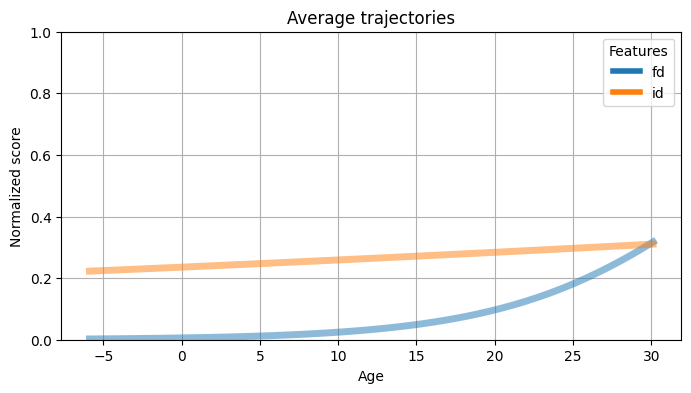

In [154]:
from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model_leaspy)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()

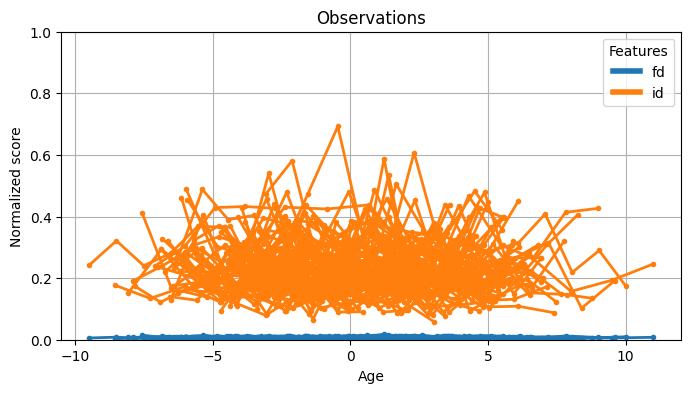

In [141]:
ax = model_plt.patient_observations(train_data, "all")
ax.grid()
plt.show()

### Personalize on train dataset

In [142]:
settings_personalization = AlgorithmSettings(
    "scipy_minimize", progress_bar=True, use_jacobian=False
)
train_ips = model_leaspy.personalize(
    train_dataset, 
    algorithm_settings=settings_personalization
)


|##################################################|   100/100 subjects

Personalize with `scipy_minimize` took: 16s


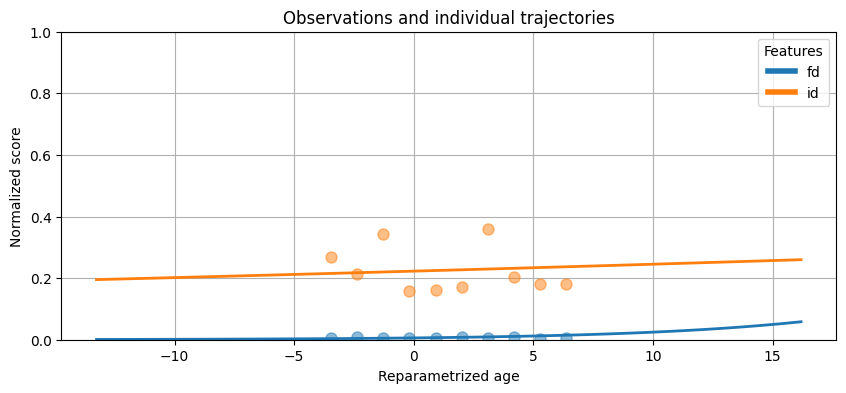

In [153]:
ax = model_plt.patient_trajectories(
    train_data,
    train_ips,
    patients_idx=train_dataset.indices[5],
    labels=list(df.columns),
    reparametrized_ages=True, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=1,
    factor_future=1,  # future extrapolation
)
ax.grid()
# ax.set_xlim(-10, 10)
plt.show()

## leaspy for each pixel

In [8]:
# Load anomaly score

train_ano_score = torch.load("notebooks/exp_results/train_ano_score_dict.pt", map_location=torch.device("cpu"), weights_only=False)
train_ano_score["fd_score"].shape

train_fds = train_ano_score["fd_score"].squeeze()
train_ids = train_ano_score["id_score"].squeeze()

train_fds.shape

train_ano_score["ids"]

array([  0,   0,   0, ..., 999, 999, 999])

In [11]:
pix_i, pix_j = 10, 10

pix_data = torch.stack((
    train_fds[:, :, pix_i, pix_j], 
    train_ids[:, :, pix_i, pix_j]
), dim=2)

pix_data = rearrange(pix_data, "b t ... -> (b t) ...")

cols = ["fd", "id"]
pix_df = pd.DataFrame(pix_data, columns=cols)
pix_df.shape

pix_df.index = pd.MultiIndex.from_arrays([train_ano_score["ids"].astype("str"), train_ano_score["ages"]], names=["ID", "TIME"])

# Normalize using sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logit(x):
    return np.log(x / (1 - x))

# pix_df["fd_sigmoid"] = pix_df["fd"].apply(sigmoid)
# pix_df["id_sigmoid"] = pix_df["id"].apply(sigmoid)

# Create leaspy dataset
pix_data = Data.from_dataframe(pix_df)
pix_dataset = Dataset(pix_data)

pix_df.head(10)

fd        id
ID TIME                     
0  -4.29  0.003703  0.008324
   -3.24  0.003470  0.000952
   -2.20  0.005174  0.003907
   -1.15  0.005164  0.001744
   -0.10  0.002483  0.009175
    0.94  0.006590  0.009644
    1.99  0.001547  0.009021
    3.03  0.001881  0.001464
    4.08  0.003122  0.012672
    5.13  0.002516  0.007774

In [15]:
# Init leaspy model
from leaspy.models import LogisticModel, LinearModel

model_leaspy = LinearModel(name="linear", source_dimension=1)
model_leaspy.is_initialized

algo_settings = AlgorithmSettings('mcmc_saem', 
                                seed=42, 
                                n_iter=100,           
                                progress_bar=True,
                                device=device)
# algo_settings.set_logs(path=None)    

model_leaspy.fit(pix_dataset, algorithm_settings=algo_settings)

 ==> Setting seed to 42
|####----------------------------------------------|   8/100 iterations

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/models/utilities.py:361: UserWarning: Mean slope of individual linear regressions made at initialization is negative for ['fd']: not properly handled in model...
  warnings.warn(
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/algo/settings.py:75: UserWarning: Outputs will be saved in '_outputs' relative to the current working directory
  self._create_root_folder(settings)
/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/torch/__init__.py:1240: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


|##################################################|   100/100 iterations

Fit with `mcmc_saem` took: 7s


### Plot

/home/kdang/projects/spartDM/.venv/lib/python3.10/site-packages/leaspy/io/logs/visualization/plotting.py:42: FutureWarning: Plotting will soon be removed from Leaspy, please use Plotter instead.
  warnings.warn(


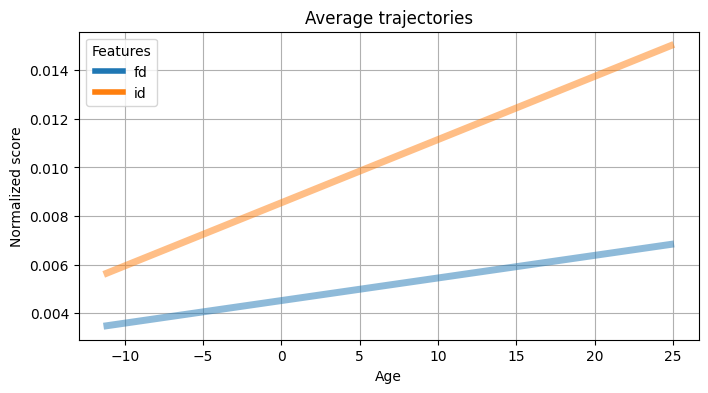

In [16]:
from leaspy.io.logs.visualization import Plotter, Plotting

model_plt = Plotting(model=model_leaspy)
ax = model_plt.average_trajectory()
ax.grid()
plt.show()

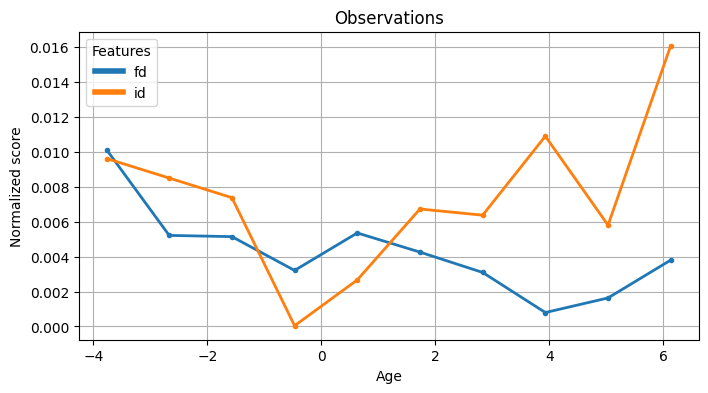

In [19]:
# Patient observation
patient_idx = pix_dataset.indices[3]
ax = model_plt.patient_observations(pix_data, patient_idx)
ax.grid()
plt.show()

### personalize on train dataset

In [20]:
settings_personalization = AlgorithmSettings(
    "scipy_minimize", progress_bar=True, use_jacobian=False
)
train_ips = model_leaspy.personalize(
    pix_dataset, 
    algorithm_settings=settings_personalization
)


|##################################################|   700/700 subjects

Personalize with `scipy_minimize` took: 1m 57s


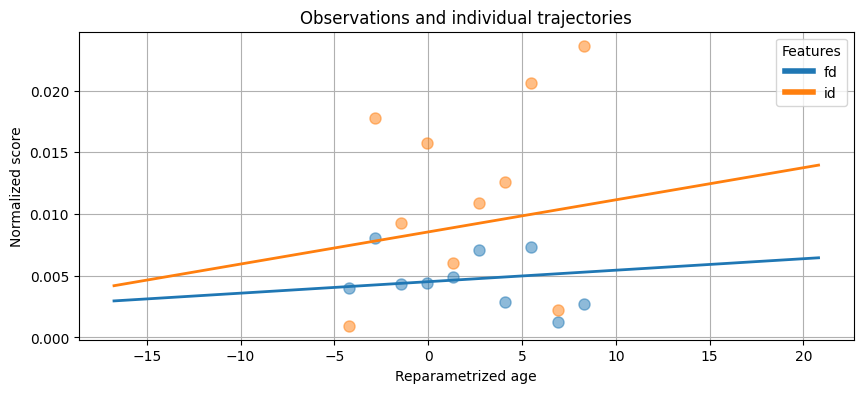

In [22]:
ax = model_plt.patient_trajectories(
    pix_data,
    train_ips,
    patients_idx=pix_dataset.indices[5],
    labels=list(pix_df.columns),
    reparametrized_ages=True, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=1,
    factor_future=1,  # future extrapolation
)
ax.grid()
# ax.set_xlim(-10, 10)
plt.show()

# Test with anomaly dataset - growing_circle20

In [28]:
# Reload the data 
import json
from src.data.datamodules import StarmenDataset
from torch.utils.data import DataLoader

split = "growing_circle20"
infer_dir = os.path.join(WORK_DIR, "infer", f"{split}_ddim100_noise250")

# Test dataset
test_ds = StarmenDataset(
    data_dir=DATA_DIR,
    split=split,
    nb_subject=None,
)
train_loader = DataLoader(test_ds, batch_size=1, shuffle=True, num_workers=1)
print(f"Len of test dataset: {len(train_loader)}")


# Read the reconstruction error files to get the index and corresponding reonconstruction image
try: 
    eval_result_file = os.path.join(infer_dir, "results", "eval_dict.json")
    with open(eval_result_file, "r") as f:
        eval_dict = json.load(f)
    test_ids = eval_dict["IDs"]
    # test_ids = np.load(recons_idx_path)
    # test_ids = test_ids.squeeze().tolist()
except FileNotFoundError:
    test_ids = test_ds.ids


# Load the original (anomalious) image from test dataset by index
x_orgs = [test_ds.get_images_by_id(id)["img"].squeeze() for id in test_ids]
x_orgs = np.stack(x_orgs).astype("float32")

ages = [test_ds.get_images_by_id(id)["age"] for id in test_ids]

# Load the groundtruth anomaly mask 
x_ano_gts = []
for id in test_ds.ids:
    x_ano_gt = test_ds.get_images_by_id(id)["anomaly_gt_seg"]

    if x_ano_gt is None:
        break
    else:
        x_ano_gts.append(x_ano_gt.squeeze())

if len(x_ano_gts) > 0: 
    x_ano_gts = np.stack(x_ano_gts).astype("float32")
    x_ano_gts.shape

# Load the original healthy images
# healthy path example= data/starmen/output_random_noacc/images/SimulatedData__Reconstruction__starman__subject_s0__tp_0.npy
x_hts = []
for id in test_ids:
    for t in range(0, 10):
        ht_path = os.path.join(DATA_DIR, "images", f"SimulatedData__Reconstruction__starman__subject_s{id}__tp_{t}.npy")
        ht = np.load(ht_path)
        x_hts.append(ht)
x_hts = np.stack(x_hts)
x_hts = rearrange(x_hts, "(b t) h w -> b t h w", t=10)
x_hts.shape

# add C dimension
x_orgs = rearrange(x_orgs, "b t h w -> b t 1 h w")
x_hts = rearrange(x_hts, "b t h w -> b t 1 h w")
if x_ano_gts is not None: 
    x_ano_gts = rearrange(x_ano_gts, "b t h w -> b t 1 h w")


# # Load reconstruction - xT_inferred
# x_recons = np.load(os.path.join(infer_dir, "results", "recons.npy"))
# x_recons.shape

# Load reconstruction - from random noise
x_recons = np.load(os.path.join(infer_dir, "results", "recons_semantic.npy"))
x_recons.shape

# convert to torch
x_orgs = to_torch(x_orgs) if not isinstance(x_orgs, torch.Tensor) else x_orgs
x_hts = to_torch(x_hts) if not isinstance(x_hts, torch.Tensor) else x_hts
x_ano_gts = to_torch(x_ano_gts) if not isinstance(x_ano_gts, torch.Tensor) else x_ano_gts
x_recons = to_torch(x_recons) if not isinstance(x_recons, torch.Tensor) else x_recons


Len of test dataset: 20


## Get f_d and i_d

In [47]:
# Pixel anomaly score

ano_fds = []
ano_ids = []
ano_idx = []
ano_ages = []

# for i in range(x_recons_semantic.shape[0]):
for i in range(x_recons.shape[0]):
    _, f_d, i_d = heat_map(
    x_recons[i], x_orgs[i], fe, v=1., fe_layers=["layer1", "layer2"]
    )

    ano_fds.append(f_d)
    ano_ids.append(i_d)
    ano_idx.append(test_ids[i])
    ano_ages.append(ages[i])

ano_fds = torch.stack(ano_fds)
ano_ids = torch.stack(ano_ids)
ano_idx = np.stack(ano_idx)

ano_idx_flat = np.repeat(ano_idx, 10)

ano_ages_flat = np.concatenate(ano_ages)

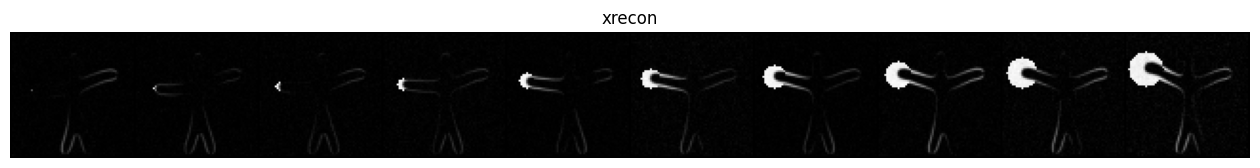

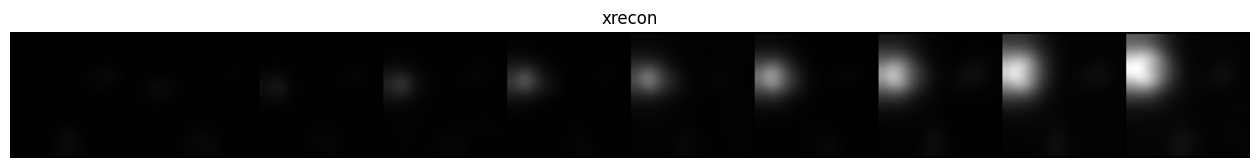

In [52]:
quick_plot_tensor(ano_ids[0], "xrecon")

i = 0
ano_map, f_d, i_d = heat_map(
x_recons[i], x_orgs[i], fe, v=1., fe_layers=["layer1", "layer2"]
)

quick_plot_tensor(ano_map, "xrecon")


## Get img anomaly score and construct dataframe

In [ ]:
img_fds = f_ds_ano.cpu().numpy()
img_fds = np.max(img_fds, axis=(2, 3, 4))

img_ids = i_ds_ano.cpu().numpy()
img_ids = np.max(img_ids, axis=(2, 3, 4))

img_ids.shape

# Construct dataframe

data_ano_score = np.stack((img_fds, img_ids), axis=2)
data_ano_score.shape

data_ano_score = rearrange(data_ano_score, "b t ... -> (b t) ...")
data_ano_score.shape
cols = ["fd", "id"]
growing_circle_df = pd.DataFrame(data_ano_score, columns=cols)
growing_circle_df.shape

growing_circle_df.index = pd.MultiIndex.from_arrays([p_ids_flat.astype("str"), p_ages_flat], names=["ID", "TIME"])
growing_circle_df.head(10)

growing_circle_data = Data.from_dataframe(growing_circle_df)
growing_circle_dataset = Dataset(growing_circle_data)

growing_circle_df.head(10)

(20, 10)

## Get pixel score

In [37]:
ano_fds = ano_fds.squeeze()
ano_ids = ano_ids.squeeze()

ano_ages_flat.shape

(200,)

In [38]:
pix_i, pix_j = 10, 10

ano_pix_data = torch.stack((
    ano_fds[:, :, pix_i, pix_j], 
    ano_ids[:, :, pix_i, pix_j]
), dim=2)

ano_pix_data = rearrange(ano_pix_data, "b t ... -> (b t) ...")

cols = ["fd", "id"]
ano_pix_df = pd.DataFrame(ano_pix_data, columns=cols)
ano_pix_df.shape

ano_pix_df.index = pd.MultiIndex.from_arrays([ano_idx_flat.astype("str"), ano_ages_flat], names=["ID", "TIME"])

# Create leaspy dataset
ano_pix_data = Data.from_dataframe(ano_pix_df)
ano_pix_dataset = Dataset(ano_pix_data)

ano_pix_df.head(20)

fd        id
ID  TIME                     
210 -3.25  0.003893  0.009762
    -2.21  0.003943  0.000530
    -1.18  0.005088  0.004294
    -0.14  0.007592  0.000874
     0.90  0.021058  0.008476
     1.93  0.051731  0.013935
     2.97  0.091978  0.013817
     4.01  0.187191  0.001566
     5.05  0.294106  0.013186
     6.08  0.296374  0.953770
332 -4.22  0.005392  0.006921
    -3.28  0.006330  0.012991
    -2.33  0.003949  0.004849
    -1.39  0.006807  0.007062
    -0.44  0.033785  0.018964
     0.50  0.050321  0.023000
     1.45  0.129137  0.012844
     2.39  0.196267  0.028131
     3.34  0.281689  0.960092
     4.28  0.258042  0.968148

## Personalize pixel score

In [39]:
settings_personalization = AlgorithmSettings(
    "scipy_minimize", progress_bar=True, use_jacobian=False
)
ano_ips = model_leaspy.personalize(
    ano_pix_dataset, 
    algorithm_settings=settings_personalization
)


|####################|   20/20 subjects

Personalize with `scipy_minimize` took: 7s


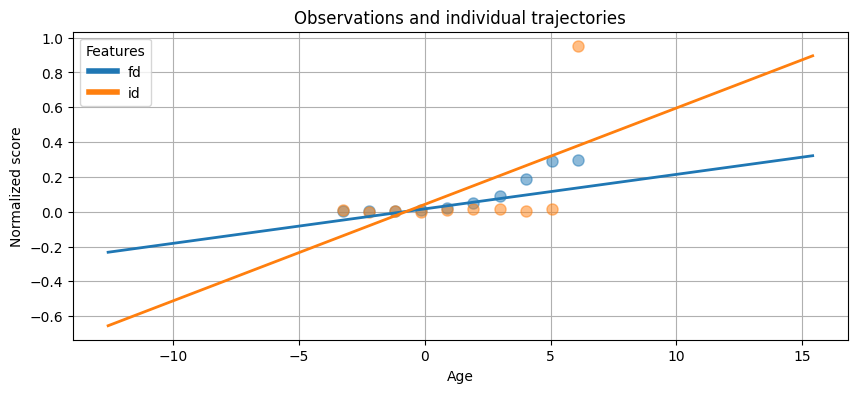

In [44]:
# Plot trajectory

ax = model_plt.patient_trajectories(
    ano_pix_data,
    ano_ips,
    patients_idx=ano_pix_dataset.indices[0],
    labels=["fd", "id"],
    reparametrized_ages=False, # check sources effect
    # plot kwargs
    # color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'],
    alpha=1,
    linestyle="-",
    linewidth=2,
    # marker=None,
    markersize=8,
    obs_alpha=0.5,  # obs_ls=':',
    figsize=(10, 4),
    factor_past=1,
    factor_future=1,  # future extrapolation
    
)
ax.grid()
# ax.set_xlim(-10, 10)
plt.show()